# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
# Dataset is an excel file
# Reading an Excel file
df = pd.read_excel('Online Retail.xlsx')
# To display the top 5 rows 
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [3]:
df.tail(5)                        # To display the bottom 5 rows

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

In [4]:
# check data types
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [5]:
# check shape
df.shape

(541909, 8)

## Task 2: Perform data cleaning

- There are 5268 duplicate rows which we will remove.
- There are 1454 rows with null Description and 135037 rows with null CustomerID.
- All 1454 rows with null Description does not have CustomerID populated.
- These are all United Kingdom rows with 0 UnitPrice. 
- 862 of these records have negative Quantity.
- These 1454 rows will be removed since they do not have a meaninful data for analysis.
- 9727 rows where quantity < 0 or UnitPrice < 0.
- We will also remove these 9727 rows from data.

In [6]:
# check for duplicate rows, if any
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5268, 8)


In [7]:
duplicate_rows_df.sort_values(by=['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country'],ascending=True,inplace=True )
duplicate_rows_df.reset_index(inplace=True)
duplicate_rows_df.head(20)

index InvoiceNo StockCode                          Description  Quantity  \
0     517    536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
1     539    536409     22111         SCOTTIE DOG HOT WATER BOTTLE         1   
2     527    536409     22866        HAND WARMER SCOTTY DOG DESIGN         1   
3     537    536409     22900      SET 2 TEA TOWELS I LOVE LONDON          1   
4     598    536412     21448            12 DAISY PEGS IN WOOD BOX         1   
5     601    536412     21448            12 DAISY PEGS IN WOOD BOX         2   
6     604    536412     21448            12 DAISY PEGS IN WOOD BOX         2   
7     618    536412     21706  FOLDING UMBRELLA RED/WHITE POLKADOT         1   
8     616    536412     21708      FOLDING UMBRELLA CREAM POLKADOT         1   
9     594    536412     22141       CHRISTMAS CRAFT TREE TOP ANGEL         1   
10    587    536412     22273                 FELTCRAFT DOLL MOLLY         1   
11    555    536412     22327    ROUND SNACK BOXES SET OF 4 SKULLS         1   
12    600    536412     22569          FELTCRAFT CUSHION BUTTERFLY         2   
13    589    536412     22749    FELTCRAFT PRINCESS CHARLOTTE DOLL         1   
14    617    536412     22900      SET 2 TEA TOWELS I LOVE LONDON          2   
15    605    536412     22902               TOTE BAG I LOVE LONDON         7   
16    620    536412    85184C    S/4 VALENTINE DECOUPAGE HEART BOX         1   
17    758    536446     21651        HANGING GLASS ETCHED TEALIGHT         6   
18    852    536464     21992       VINTAGE PAISLEY STATIONERY SET         1   
19    831    536464     22866        HAND WARMER SCOTTY DOG DESIGN         1   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
1  2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
2  2010-12-01 11:45:00       2.10     17908.0  United Kingdom  
3  2010-12-01 11:45:00       2.95     17908.0  United Kingdom  
4  2010-12-01 11:49:00       1.65     17920.0  United Kingdom  
5  2010-12-01 11:49:00       1.65     17920.0  United Kingdom  
6  2010-12-01 11:49:00       1.65     17920.0  United Kingdom  
7  2010-12-01 11:49:00       4.95     17920.0  United Kingdom  
8  2010-12-01 11:49:00       4.95     17920.0  United Kingdom  
9  2010-12-01 11:49:00       2.10     17920.0  United Kingdom  
10 2010-12-01 11:49:00       2.95     17920.0  United Kingdom  
11 2010-12-01 11:49:00       2.95     17920.0  United Kingdom  
12 2010-12-01 11:49:00       3.75     17920.0  United Kingdom  
13 2010-12-01 11:49:00       3.75     17920.0  United Kingdom  
14 2010-12-01 11:49:00       2.95     17920.0  United Kingdom  
15 2010-12-01 11:49:00       2.10     17920.0  United Kingdom  
16 2010-12-01 11:49:00       2.95     17920.0  United Kingdom  
17 2010-12-01 12:15:00       1.65     15983.0  United Kingdom  
18 2010-12-01 12:23:00       2.95     17968.0  United Kingdom  
19 2010-12-01 12:23:00       2.10     17968.0  United Kingdom

In [8]:
# Now let us remove the duplicate data because it's ok to remove them.
df.count()      # Used to count the number of rows

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [9]:
# collect rows counts for each df column before dup removal
colCntStatsBeforeDupRemoval=df.count().to_frame(name="ColRowsCnt")
colCntStatsBeforeDupRemoval.reset_index(inplace=True)
colCntStatsBeforeDupRemoval

index  ColRowsCnt
0    InvoiceNo      541909
1    StockCode      541909
2  Description      540455
3     Quantity      541909
4  InvoiceDate      541909
5    UnitPrice      541909
6   CustomerID      406829
7      Country      541909

In [10]:
df = df.drop_duplicates()
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [11]:
df.count()      # count the number of rows after duplicates removal

InvoiceNo      536641
StockCode      536641
Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
dtype: int64

In [12]:
colCntStatsAfterDupRemoval=df.count().to_frame(name="ColRowsAfterDupRemCnt")
colCntStatsAfterDupRemoval.reset_index(inplace=True)
colCntStatsAfterDupRemoval

index  ColRowsAfterDupRemCnt
0    InvoiceNo                 536641
1    StockCode                 536641
2  Description                 535187
3     Quantity                 536641
4  InvoiceDate                 536641
5    UnitPrice                 536641
6   CustomerID                 401604
7      Country                 536641

In [13]:
# sanity check dup removal
merged_df = pd.merge(colCntStatsBeforeDupRemoval,colCntStatsAfterDupRemoval,on='index')
merged_df['Diff']=merged_df['ColRowsCnt']-merged_df['ColRowsAfterDupRemCnt']
merged_df

index  ColRowsCnt  ColRowsAfterDupRemCnt  Diff
0    InvoiceNo      541909                 536641  5268
1    StockCode      541909                 536641  5268
2  Description      540455                 535187  5268
3     Quantity      541909                 536641  5268
4  InvoiceDate      541909                 536641  5268
5    UnitPrice      541909                 536641  5268
6   CustomerID      406829                 401604  5225
7      Country      541909                 536641  5268

In [14]:
#check for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [15]:
# 135037 null values for CustomerID!
# Select rows where column CustomerID values are null
null_CustomerID_df = df[df['CustomerID'].isnull()]
null_CustomerID_df.head()

InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
622  2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445 2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446 2010-12-01 14:32:00       1.66         NaN  United Kingdom

In [16]:
# 1454 null values for Description!
# Select rows where column Description values are null
null_Description_df = df[df['Description'].isnull()]
null_Description_df.head()

InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56 2010-12-01 11:52:00        0.0   
1970    536545     21134         NaN         1 2010-12-01 14:32:00        0.0   
1971    536546     22145         NaN         1 2010-12-01 14:33:00        0.0   
1972    536547     37509         NaN         1 2010-12-01 14:33:00        0.0   
1987    536549    85226A         NaN         1 2010-12-01 14:34:00        0.0   

      CustomerID         Country  
622          NaN  United Kingdom  
1970         NaN  United Kingdom  
1971         NaN  United Kingdom  
1972         NaN  United Kingdom  
1987         NaN  United Kingdom

In [17]:
# all records with null Description does not have CustomerID populated
null_Description_CustomerID_df=df[df['Description'].isnull() & df['CustomerID'].isnull()]
null_Description_CustomerID_df.count()

InvoiceNo      1454
StockCode      1454
Description       0
Quantity       1454
InvoiceDate    1454
UnitPrice      1454
CustomerID        0
Country        1454
dtype: int64

In [18]:
null_Description_CustomerID_df.head()

InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56 2010-12-01 11:52:00        0.0   
1970    536545     21134         NaN         1 2010-12-01 14:32:00        0.0   
1971    536546     22145         NaN         1 2010-12-01 14:33:00        0.0   
1972    536547     37509         NaN         1 2010-12-01 14:33:00        0.0   
1987    536549    85226A         NaN         1 2010-12-01 14:34:00        0.0   

      CustomerID         Country  
622          NaN  United Kingdom  
1970         NaN  United Kingdom  
1971         NaN  United Kingdom  
1972         NaN  United Kingdom  
1987         NaN  United Kingdom

In [19]:
# get descriptive statistics for null_Description_CustomerID_df
null_Description_CustomerID_df.describe()

Quantity  UnitPrice  CustomerID
count  1454.000000     1454.0         0.0
mean     -9.359697        0.0         NaN
std     243.238758        0.0         NaN
min   -3667.000000        0.0         NaN
25%     -24.000000        0.0         NaN
50%      -3.000000        0.0         NaN
75%       4.000000        0.0         NaN
max    5568.000000        0.0         NaN

In [20]:
null_Description_CustomerID_df[null_Description_CustomerID_df['Quantity'] == 5568]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
74614    542504     37413         NaN      5568 2011-01-28 12:03:00   

       UnitPrice  CustomerID         Country  
74614        0.0         NaN  United Kingdom

In [21]:
null_Description_CustomerID_df[null_Description_CustomerID_df['Quantity'] == -3667]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
341601    566768     16045         NaN     -3667 2011-09-14 17:53:00   

        UnitPrice  CustomerID         Country  
341601        0.0         NaN  United Kingdom

In [22]:
null_Description_CustomerID_df['Country'].value_counts()

United Kingdom    1454
Name: Country, dtype: int64

In [23]:
null_Description_CustomerID_df['UnitPrice'].value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

In [24]:
null_Description_CustomerID_df[null_Description_CustomerID_df['Quantity'] < 0].count()

InvoiceNo      862
StockCode      862
Description      0
Quantity       862
InvoiceDate    862
UnitPrice      862
CustomerID       0
Country        862
dtype: int64

In [25]:
null_Description_CustomerID_df[null_Description_CustomerID_df['Quantity'] >= 0].count()

InvoiceNo      592
StockCode      592
Description      0
Quantity       592
InvoiceDate    592
UnitPrice      592
CustomerID       0
Country        592
dtype: int64

In [26]:
#dataset after removal of 1454 rows
df_cleaned_1454 = df[~(df['Description'].isnull() & df['CustomerID'].isnull())]
df_cleaned_1454.count()

InvoiceNo      535187
StockCode      535187
Description    535187
Quantity       535187
InvoiceDate    535187
UnitPrice      535187
CustomerID     401604
Country        535187
dtype: int64

In [27]:
# still there are rows where quantity < 0 or UnitPrice < 0
df_cleaned_1454.describe()

Quantity      UnitPrice     CustomerID
count  535187.000000  535187.000000  401604.000000
mean        9.671593       4.645242   15281.160818
std       219.059056      97.364810    1714.006089
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13939.000000
50%         3.000000       2.080000   15145.000000
75%        10.000000       4.130000   16784.000000
max     80995.000000   38970.000000   18287.000000

In [28]:
df_q_price_less_than_0=df_cleaned_1454[(df_cleaned_1454['Quantity'] < 0) | (df_cleaned_1454['UnitPrice'] < 0)]
df_q_price_less_than_0.count()

InvoiceNo      9727
StockCode      9727
Description    9727
Quantity       9727
InvoiceDate    9727
UnitPrice      9727
CustomerID     8872
Country        9727
dtype: int64

In [29]:
df_q_price_less_than_0.head(10)

InvoiceNo StockCode                        Description  Quantity  \
141   C536379         D                           Discount        -1   
154   C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238   C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
239   C536391     21484        CHICK GREY HOT WATER BOTTLE       -12   
240   C536391     22557   PLASTERS IN TIN VINTAGE PAISLEY        -12   
241   C536391     22553             PLASTERS IN TIN SKULLS       -24   
939   C536506     22960           JAM MAKING SET WITH JARS        -6   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
238 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
239 2010-12-01 10:24:00       3.45     17548.0  United Kingdom  
240 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
241 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
939 2010-12-01 12:38:00       4.25     17897.0  United Kingdom

In [30]:
# 2 rows with -11062.06 UnitPrice
df_q_price_less_than_0[df_q_price_less_than_0['UnitPrice'] < 0].head(10)

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

In [31]:
df_q_price_less_than_0.describe()

Quantity     UnitPrice    CustomerID
count   9727.000000   9727.000000   8872.000000
mean     -44.860594     43.919084  14990.152953
std     1139.751080    670.648891   1708.230387
min   -80995.000000 -11062.060000  12346.000000
25%       -8.000000      1.250000  13505.000000
50%       -2.000000      2.550000  14868.000000
75%       -1.000000      4.950000  16393.000000
max        1.000000  38970.000000  18282.000000

In [32]:
df_cleaned = df_cleaned_1454[~((df_cleaned_1454['Quantity'] < 0) | (df_cleaned_1454['UnitPrice'] < 0))]
df_cleaned.count()

InvoiceNo      525460
StockCode      525460
Description    525460
Quantity       525460
InvoiceDate    525460
UnitPrice      525460
CustomerID     392732
Country        525460
dtype: int64

In [33]:
df_cleaned.describe()

Quantity      UnitPrice     CustomerID
count  525460.00000  525460.000000  392732.000000
mean       10.68106       3.918228   15287.734822
std       157.39957      36.073270    1713.567773
min         1.00000       0.000000   12346.000000
25%         1.00000       1.250000   13955.000000
50%         4.00000       2.080000   15150.000000
75%        11.00000       4.130000   16791.000000
max     80995.00000   13541.330000   18287.000000

In [34]:
# we are still keeping records with null CustomerID, but with meaningful Description, Quantity and UnitPrice.
df_cleaned[df_cleaned['CustomerID'].isnull()].head(10)

InvoiceNo StockCode                          Description  Quantity  \
1443    536544     21773      DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774      DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786                   POLKADOT RAIN HAT          4   
1446    536544     21787                RAIN PONCHO RETROSPOT         2   
1447    536544     21790                   VINTAGE SNAP CARDS         9   
1448    536544     21791   VINTAGE HEADS AND TAILS CARD GAME          2   
1449    536544     21801  CHRISTMAS TREE DECORATION WITH BELL        10   
1450    536544     21802      CHRISTMAS TREE HEART DECORATION         9   
1451    536544     21803       CHRISTMAS TREE STAR DECORATION        11   
1452    536544     21809     CHRISTMAS HANGING TREE WITH BELL         1   

             InvoiceDate  UnitPrice  CustomerID         Country  
1443 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445 2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446 2010-12-01 14:32:00       1.66         NaN  United Kingdom  
1447 2010-12-01 14:32:00       1.66         NaN  United Kingdom  
1448 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1449 2010-12-01 14:32:00       0.43         NaN  United Kingdom  
1450 2010-12-01 14:32:00       0.43         NaN  United Kingdom  
1451 2010-12-01 14:32:00       0.43         NaN  United Kingdom  
1452 2010-12-01 14:32:00       2.51         NaN  United Kingdom

In [35]:
# save above df
save_df_cust = df_cleaned
save_df_cust.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
7 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
8 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
9 2010-12-01 08:34:00       1.69     13047.0  United Kingdom

In [36]:
# we are dropping unneccessary columns
df_cleaned_final = df_cleaned.drop(['InvoiceNo', 'StockCode', 'CustomerID'], axis=1)
df_cleaned_final.head(5)

Description  Quantity         InvoiceDate  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   UnitPrice         Country  
0       2.55  United Kingdom  
1       3.39  United Kingdom  
2       2.75  United Kingdom  
3       3.39  United Kingdom  
4       3.39  United Kingdom

In [37]:
df_cleaned_final.describe(include='all')

Description      Quantity          InvoiceDate  \
count                               525460  525460.00000               525460   
unique                                4077           NaN                18639   
top     WHITE HANGING HEART T-LIGHT HOLDER           NaN  2011-10-31 14:41:00   
freq                                  2315           NaN                 1114   
first                                  NaN           NaN  2010-12-01 08:26:00   
last                                   NaN           NaN  2011-12-09 12:50:00   
mean                                   NaN      10.68106                  NaN   
std                                    NaN     157.39957                  NaN   
min                                    NaN       1.00000                  NaN   
25%                                    NaN       1.00000                  NaN   
50%                                    NaN       4.00000                  NaN   
75%                                    NaN      11.00000                  NaN   
max                                    NaN   80995.00000                  NaN   

            UnitPrice         Country  
count   525460.000000          525460  
unique            NaN              38  
top               NaN  United Kingdom  
freq              NaN          480549  
first             NaN             NaN  
last              NaN             NaN  
mean         3.918228             NaN  
std         36.073270             NaN  
min          0.000000             NaN  
25%          1.250000             NaN  
50%          2.080000             NaN  
75%          4.130000             NaN  
max      13541.330000             NaN

## Task3: Explore the basic statistics of the dataset, including measures of central tendency and dispersion.

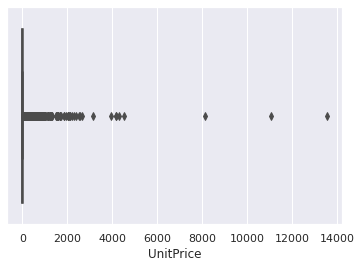

In [38]:
# Outliers in UnitPrice
sns.boxplot(x=df_cleaned_final['UnitPrice'])

In [39]:
df_cleaned_final[df_cleaned_final['UnitPrice'] > 3000]

Description  Quantity         InvoiceDate  UnitPrice  \
15017        AMAZON FEE         1 2010-12-07 15:08:00   13541.33   
173382          POSTAGE         1 2011-05-03 13:46:00    8142.75   
268028           Manual         1 2011-07-18 12:30:00    4287.63   
297723   DOTCOM POSTAGE         1 2011-08-11 10:14:00    4505.17   
299982  Adjust bad debt         1 2011-08-12 14:50:00   11062.06   
374542           Manual         1 2011-10-03 16:44:00    3155.95   
406406           Manual         1 2011-10-19 11:18:00    3949.32   
422351           Manual         1 2011-10-27 14:13:00    4161.06   
422376           Manual         1 2011-10-27 14:20:00    4161.06   

               Country  
15017   United Kingdom  
173382  United Kingdom  
268028  United Kingdom  
297723  United Kingdom  
299982  United Kingdom  
374542  United Kingdom  
406406       Singapore  
422351          France  
422376          France

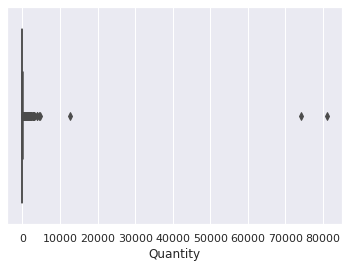

In [40]:
# Outliers in Quantity
sns.boxplot(x=df_cleaned_final['Quantity'])

In [41]:
df_cleaned_final[df_cleaned_final['Quantity'] > 10000]

Description  Quantity         InvoiceDate  \
61619   MEDIUM CERAMIC TOP STORAGE JAR     74215 2011-01-18 10:01:00   
502122  ASSTD DESIGN 3D PAPER STICKERS     12540 2011-11-25 15:57:00   
540421     PAPER CRAFT , LITTLE BIRDIE     80995 2011-12-09 09:15:00   

        UnitPrice         Country  
61619        1.04  United Kingdom  
502122       0.00  United Kingdom  
540421       2.08  United Kingdom

Text(0.5, 0, 'Quantity')

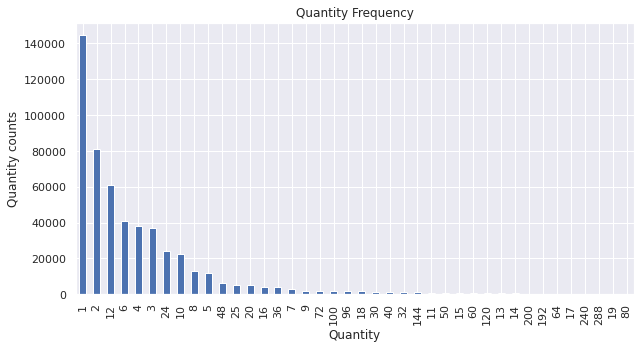

In [42]:
#  The most frequent quantity sizes are 1 and 2
df_cleaned_final.Quantity.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Quantity Frequency")
plt.ylabel('Quantity counts')
plt.xlabel('Quantity')

Text(0.5, 0, 'Description')

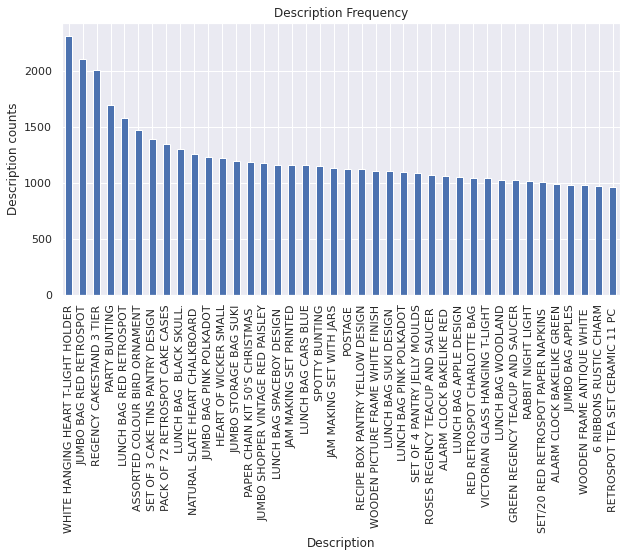

In [43]:
# Most frequent products are WHITE HANGING HEART T-LIGHT HOLDER and JUMBO BAG RED RETROSPOT
df_cleaned_final.Description.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Description Frequency")
plt.ylabel('Description counts')
plt.xlabel('Description')

__Removing Outliers in UnitPrice and Quantity__

In [44]:
# save UnitPrice outliers
df_UnitPrice_outliers=df_cleaned_final[df_cleaned_final['UnitPrice'] > 3000]
df_UnitPrice_outliers

Description  Quantity         InvoiceDate  UnitPrice  \
15017        AMAZON FEE         1 2010-12-07 15:08:00   13541.33   
173382          POSTAGE         1 2011-05-03 13:46:00    8142.75   
268028           Manual         1 2011-07-18 12:30:00    4287.63   
297723   DOTCOM POSTAGE         1 2011-08-11 10:14:00    4505.17   
299982  Adjust bad debt         1 2011-08-12 14:50:00   11062.06   
374542           Manual         1 2011-10-03 16:44:00    3155.95   
406406           Manual         1 2011-10-19 11:18:00    3949.32   
422351           Manual         1 2011-10-27 14:13:00    4161.06   
422376           Manual         1 2011-10-27 14:20:00    4161.06   

               Country  
15017   United Kingdom  
173382  United Kingdom  
268028  United Kingdom  
297723  United Kingdom  
299982  United Kingdom  
374542  United Kingdom  
406406       Singapore  
422351          France  
422376          France

In [45]:
list(df_UnitPrice_outliers.index)

[15017, 173382, 268028, 297723, 299982, 374542, 406406, 422351, 422376]

In [46]:
print("Shape before Unitprice outlier removal: ",df_cleaned_final.shape)
df_cleaned_final_UnitPrice_out_rem = df_cleaned_final.drop(list(df_UnitPrice_outliers.index))
print("Shape after  Unitprice outlier removal: ",df_cleaned_final_UnitPrice_out_rem.shape)

Shape before Unitprice outlier removal:  (525460, 5)
Shape after  Unitprice outlier removal:  (525451, 5)


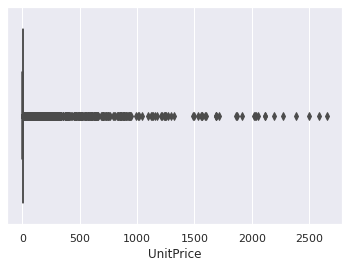

In [47]:
sns.boxplot(x=df_cleaned_final_UnitPrice_out_rem['UnitPrice'])

In [48]:
# save Quantity outliers
df_Quantity_outliers=df_cleaned_final_UnitPrice_out_rem[df_cleaned_final_UnitPrice_out_rem['Quantity'] > 10000]
df_Quantity_outliers

Description  Quantity         InvoiceDate  \
61619   MEDIUM CERAMIC TOP STORAGE JAR     74215 2011-01-18 10:01:00   
502122  ASSTD DESIGN 3D PAPER STICKERS     12540 2011-11-25 15:57:00   
540421     PAPER CRAFT , LITTLE BIRDIE     80995 2011-12-09 09:15:00   

        UnitPrice         Country  
61619        1.04  United Kingdom  
502122       0.00  United Kingdom  
540421       2.08  United Kingdom

In [49]:
print("Shape before Quantity outlier removal: ",df_cleaned_final_UnitPrice_out_rem.shape)
df_cleaned_final_UnitPrice_Quantity_out_rem=df_cleaned_final_UnitPrice_out_rem.drop(list(df_Quantity_outliers.index))
print("Shape after  Quantity outlier removal: ",df_cleaned_final_UnitPrice_Quantity_out_rem.shape)

Shape before Quantity outlier removal:  (525451, 5)
Shape after  Quantity outlier removal:  (525448, 5)


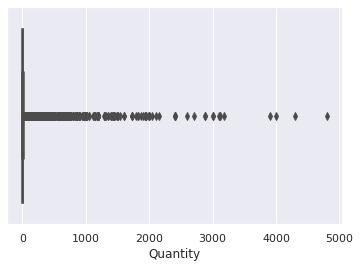

In [50]:
sns.boxplot(x=df_cleaned_final_UnitPrice_Quantity_out_rem['Quantity'])

In [51]:
# let's calculate now Sales = Quantity * UnitPrice
df_cleaned_final_UnitPrice_Quantity_out_rem['Sales']=df_cleaned_final_UnitPrice_Quantity_out_rem['Quantity']*df_cleaned_final_UnitPrice_Quantity_out_rem['UnitPrice']
df_cleaned_final_UnitPrice_Quantity_out_rem.head(10)

Description  Quantity         InvoiceDate  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   
5         SET 7 BABUSHKA NESTING BOXES         2 2010-12-01 08:26:00   
6    GLASS STAR FROSTED T-LIGHT HOLDER         6 2010-12-01 08:26:00   
7               HAND WARMER UNION JACK         6 2010-12-01 08:28:00   
8            HAND WARMER RED POLKA DOT         6 2010-12-01 08:28:00   
9        ASSORTED COLOUR BIRD ORNAMENT        32 2010-12-01 08:34:00   

   UnitPrice         Country  Sales  
0       2.55  United Kingdom  15.30  
1       3.39  United Kingdom  20.34  
2       2.75  United Kingdom  22.00  
3       3.39  United Kingdom  20.34  
4       3.39  United Kingdom  20.34  
5       7.65  United Kingdom  15.30  
6       4.25  United Kingdom  25.50  
7       1.85  United Kingdom  11.10  
8       1.85  United Kingdom  11.10  
9       1.69  United Kingdom  54.08

In [52]:
print("Before removal 0 Sales: ",df_cleaned_final_UnitPrice_Quantity_out_rem.shape)
df_cleaned_final_UnitPrice_Quantity_out_0_sales=df_cleaned_final_UnitPrice_Quantity_out_rem[df_cleaned_final_UnitPrice_Quantity_out_rem['Sales'] ==0]
print("0 Sales: ",df_cleaned_final_UnitPrice_Quantity_out_0_sales.shape)
df_cleaned = df_cleaned_final_UnitPrice_Quantity_out_rem[~(df_cleaned_final_UnitPrice_Quantity_out_rem['Sales'] ==0)]
print("After removal 0 Sales: ",df_cleaned.shape)

Before removal 0 Sales:  (525448, 6)
0 Sales:  (581, 6)
After removal 0 Sales:  (524867, 6)


In [53]:
print("min UnitPrice: ",df_cleaned['UnitPrice'].min())
print("max UnitPrice: ",df_cleaned['UnitPrice'].max())

min UnitPrice:  0.001
max UnitPrice:  2653.95


In [54]:
print("min Quantity: ",df_cleaned['Quantity'].min())
print("max Quantity: ",df_cleaned['Quantity'].max())

min Quantity:  1
max Quantity:  4800


In [55]:
df_sales = df_cleaned[['Description','Sales']].groupby('Description').sum()
df_sales.rename(columns={'Sales': 'TotalSales'}, inplace=True)
df_sales.sort_values(by='TotalSales', ascending=False, inplace=True)
df_sales.reset_index(inplace=True)
df_sales.head(10)

Description  TotalSales
0                      DOTCOM POSTAGE   201743.60
1            REGENCY CAKESTAND 3 TIER   174156.54
2  WHITE HANGING HEART T-LIGHT HOLDER   106236.72
3                       PARTY BUNTING    99445.23
4             JUMBO BAG RED RETROSPOT    94159.81
5                             POSTAGE    69959.13
6                  RABBIT NIGHT LIGHT    66870.03
7     PAPER CHAIN KIT 50'S CHRISTMAS     64875.59
8       ASSORTED COLOUR BIRD ORNAMENT    58927.62
9                              Manual    58037.80

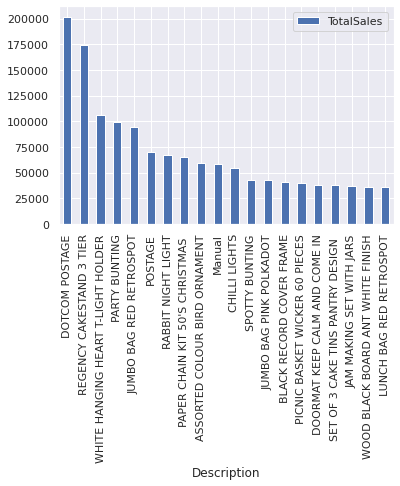

In [56]:
# Top 20 sales
df_sales.head(20).plot(x='Description', y='TotalSales', kind='bar') 
plt.show()

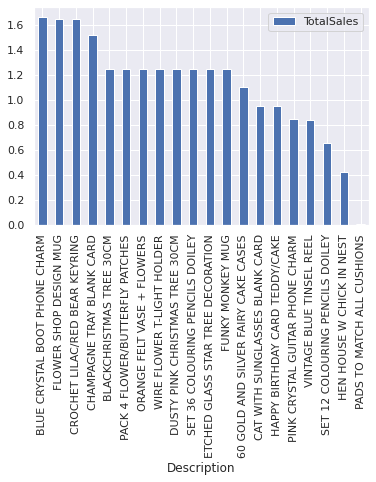

In [57]:
# The least 20 sales
df_sales[df_sales['TotalSales'] > 0].tail(20).plot(x='Description', y='TotalSales', kind='bar') 
plt.show()

In [58]:
df_sales[df_sales['TotalSales'] > 0].tail(20)

Description  TotalSales
4004        BLUE CRYSTAL BOOT PHONE CHARM       1.660
4005               FLOWER SHOP DESIGN MUG       1.650
4006       CROCHET LILAC/RED BEAR KEYRING       1.650
4007            CHAMPAGNE TRAY BLANK CARD       1.520
4008             BLACKCHRISTMAS TREE 30CM       1.250
4009      PACK 4 FLOWER/BUTTERFLY PATCHES       1.250
4010           ORANGE FELT VASE + FLOWERS       1.250
4011           WIRE FLOWER T-LIGHT HOLDER       1.250
4012       DUSTY PINK CHRISTMAS TREE 30CM       1.250
4013      SET 36 COLOURING PENCILS DOILEY       1.250
4014    ETCHED GLASS STAR TREE DECORATION       1.250
4015                     FUNKY MONKEY MUG       1.250
4016  60 GOLD AND SILVER FAIRY CAKE CASES       1.100
4017       CAT WITH SUNGLASSES BLANK CARD       0.950
4018       HAPPY BIRTHDAY CARD TEDDY/CAKE       0.950
4019      PINK CRYSTAL GUITAR PHONE CHARM       0.850
4020             VINTAGE BLUE TINSEL REEL       0.840
4021      SET 12 COLOURING PENCILS DOILEY       0.650
4022            HEN HOUSE W CHICK IN NEST       0.420
4023           PADS TO MATCH ALL CUSHIONS       0.003

Summary:
- 9 outliers in UnitPrice removed (UnitPrice > 3000)
- 3 outliers in Quantity removed (Quantity > 10000)
- 581 rows with Sales = 0 removed.

- In statistics, a correlation coefficient of 0.5 indicates a moderate positive correlation:
https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm, https://articles.outlier.org/pearson-correlation-coefficient
- Correlation coefficients between 0.4 and 0.7 are generally considered moderate:
https://articles.outlier.org/pearson-correlation-coefficient
- A correlation greater than 0.8 is considered strong:
https://mathbitsnotebook.com/Algebra2/Statistics/STCorrelationCoefficients.html

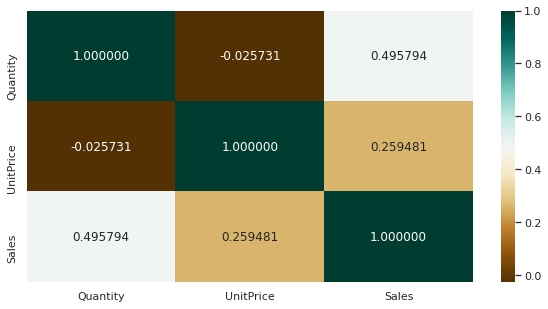

In [59]:
# moderate positive correlation of 0.495794 between Quantity and Sales is expected (more quantity sold larger sales)
# weak positive correlation of 0.259481 between UnitPrice and Sales indicates larger UnitPrice would generate larger Sales
# very weak negative correlation of -0.025731, almost no correlation, between Quantity and UnitPrice.
plt.figure(figsize=(10,5))
c= df_cleaned.corr()
sns.heatmap(c,cmap="BrBG",annot=True, fmt=".6f")

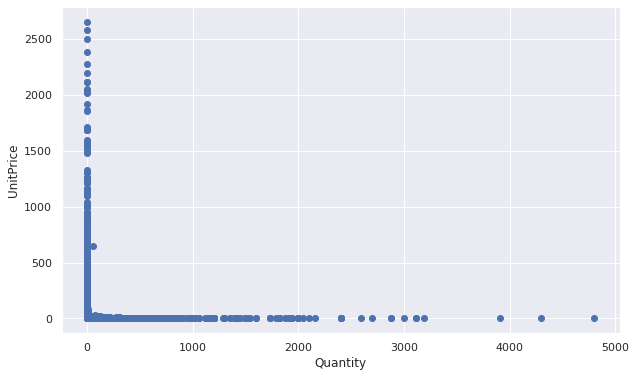

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_cleaned['Quantity'], df_cleaned['UnitPrice'])
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
plt.show()

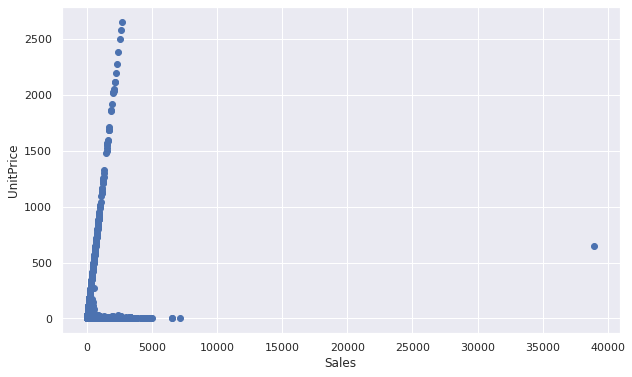

In [61]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_cleaned['Sales'], df_cleaned['UnitPrice'])
ax.set_xlabel('Sales')
ax.set_ylabel('UnitPrice')
plt.show()

In [62]:
df_cleaned[df_cleaned['Sales'] > 35000]

Description  Quantity         InvoiceDate  \
222680  PICNIC BASKET WICKER 60 PIECES        60 2011-06-10 15:28:00   

        UnitPrice         Country    Sales  
222680      649.5  United Kingdom  38970.0

In [63]:
# Total Sales by Country
df_sales_by_country = df_cleaned[['Country','Sales']].groupby('Country').sum()
df_sales_by_country.rename(columns={'Sales': 'TotalSales'}, inplace=True)
df_sales_by_country.sort_values(by='TotalSales', ascending=False, inplace=True)
df_sales_by_country.reset_index(inplace=True)
df_sales_by_country.head(40)

Country    TotalSales
0         United Kingdom  8.711396e+06
1            Netherlands  2.854463e+05
2                   EIRE  2.831405e+05
3                Germany  2.286784e+05
4                 France  2.013032e+05
5              Australia  1.384538e+05
6                  Spain  6.155856e+04
7            Switzerland  5.706760e+04
8                Belgium  4.119634e+04
9                 Sweden  3.836783e+04
10                 Japan  3.741637e+04
11                Norway  3.616544e+04
12              Portugal  3.368305e+04
13               Finland  2.254608e+04
14       Channel Islands  2.044054e+04
15               Denmark  1.895534e+04
16                 Italy  1.748324e+04
17             Singapore  1.732997e+04
18             Hong Kong  1.548300e+04
19                Cyprus  1.350285e+04
20               Austria  1.019868e+04
21                Israel  8.129410e+03
22                Poland  7.334650e+03
23                Greece  4.760520e+03
24           Unspecified  4.740940e+03
25               Iceland  4.310000e+03
26                Canada  3.666380e+03
27                   USA  3.580390e+03
28                 Malta  2.725590e+03
29  United Arab Emirates  1.902280e+03
30               Lebanon  1.693880e+03
31             Lithuania  1.661060e+03
32    European Community  1.300250e+03
33                Brazil  1.143600e+03
34                   RSA  1.002310e+03
35        Czech Republic  8.267400e+02
36               Bahrain  7.541400e+02
37          Saudi Arabia  1.459200e+02

In [64]:
df_country_unspec = df_cleaned[df_cleaned['Country'] == 'Unspecified']
print('Shape of Unspecified country: ',df_country_unspec.shape)
df_country_unspec.head(10)

Shape of Unspecified country:  (442, 6)


Description  Quantity         InvoiceDate  \
152712               DOORMAT RED RETROSPOT         2 2011-04-11 13:29:00   
152713             DOORMAT WELCOME SUNRISE         2 2011-04-11 13:29:00   
152714          DOORMAT MULTICOLOUR STRIPE         2 2011-04-11 13:29:00   
152715         PACK OF 72 SKULL CAKE CASES        24 2011-04-11 13:29:00   
152716  PACK OF 60 PINK PAISLEY CAKE CASES        24 2011-04-11 13:29:00   
152717      PACK OF 60 MUSHROOM CAKE CASES        24 2011-04-11 13:29:00   
152718     PACK OF 72 RETROSPOT CAKE CASES        24 2011-04-11 13:29:00   
152719      72 SWEETHEART FAIRY CAKE CASES        24 2011-04-11 13:29:00   
152720         60 TEATIME FAIRY CAKE CASES        24 2011-04-11 13:29:00   
152721    SET OF 36 PAISLEY FLOWER DOILIES        12 2011-04-11 13:29:00   

        UnitPrice      Country  Sales  
152712       7.95  Unspecified   15.9  
152713       7.95  Unspecified   15.9  
152714       7.95  Unspecified   15.9  
152715       0.55  Unspecified   13.2  
152716       0.55  Unspecified   13.2  
152717       0.55  Unspecified   13.2  
152718       0.55  Unspecified   13.2  
152719       0.55  Unspecified   13.2  
152720       0.55  Unspecified   13.2  
152721       1.45  Unspecified   17.4

In [65]:
# Extract year and quarter, then combine them into a single column
# Add day_of_week and month so we can explore the sales trends over time
df_cleaned['year_quarter'] = df_cleaned['InvoiceDate'].dt.to_period('Q').astype(str)
df_cleaned['day_of_week'] = df_cleaned['InvoiceDate'].dt.day_name()
df_cleaned['year_month'] = df_cleaned['InvoiceDate'].dt.to_period('M')
df_cleaned.head(10)

Description  Quantity         InvoiceDate  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   
5         SET 7 BABUSHKA NESTING BOXES         2 2010-12-01 08:26:00   
6    GLASS STAR FROSTED T-LIGHT HOLDER         6 2010-12-01 08:26:00   
7               HAND WARMER UNION JACK         6 2010-12-01 08:28:00   
8            HAND WARMER RED POLKA DOT         6 2010-12-01 08:28:00   
9        ASSORTED COLOUR BIRD ORNAMENT        32 2010-12-01 08:34:00   

   UnitPrice         Country  Sales year_quarter day_of_week year_month  
0       2.55  United Kingdom  15.30       2010Q4   Wednesday    2010-12  
1       3.39  United Kingdom  20.34       2010Q4   Wednesday    2010-12  
2       2.75  United Kingdom  22.00       2010Q4   Wednesday    2010-12  
3       3.39  United Kingdom  20.34       2010Q4   Wednesday    2010-12  
4       3.39  United Kingdom  20.34       2010Q4   Wednesday    2010-12  
5       7.65  United Kingdom  15.30       2010Q4   Wednesday    2010-12  
6       4.25  United Kingdom  25.50       2010Q4   Wednesday    2010-12  
7       1.85  United Kingdom  11.10       2010Q4   Wednesday    2010-12  
8       1.85  United Kingdom  11.10       2010Q4   Wednesday    2010-12  
9       1.69  United Kingdom  54.08       2010Q4   Wednesday    2010-12

__The basic statistics of the cleaned dataset__

In [66]:
#input data shape (536641, 8)
#There are 5268 duplicate rows which we will remove.
#There are 1454 rows with null Description and 135037 rows with null CustomerID.
#All 1454 rows with null Description does not have CustomerID populated.
#These are all United Kingdom rows with 0 UnitPrice.
#862 of these records have negative Quantity.
#These 1454 rows will be removed since they do not have a meaninful data for analysis.
#9727 rows where quantity < 0 or UnitPrice < 0.
#We will also remove these 9727 rows from data.
#9 outliers in UnitPrice removed (UnitPrice > 3000)
#3 outliers in Quantity removed (Quantity > 10000)
#581 rows with Sales = 0 removed.
data_info = {'Count':[536641,5268,1454,135037,9727,9,3,581,442],
             'Type': ['TotalRows','Dups','NullDescription','NullCustID','QuantOrUnitPriceNegative','UnitPriceOutlier','QuantityOutlier','0Sales','UnspecifiedCountry']}
df_data_info=pd.DataFrame(data_info)
df_data_info['PercOfTotalRows']=df_data_info['Count'].apply(lambda x: 100*x/536641)
df_data_info

Count                      Type  PercOfTotalRows
0  536641                 TotalRows       100.000000
1    5268                      Dups         0.981662
2    1454           NullDescription         0.270945
3  135037                NullCustID        25.163377
4    9727  QuantOrUnitPriceNegative         1.812571
5       9          UnitPriceOutlier         0.001677
6       3           QuantityOutlier         0.000559
7     581                    0Sales         0.108266
8     442        UnspecifiedCountry         0.082364

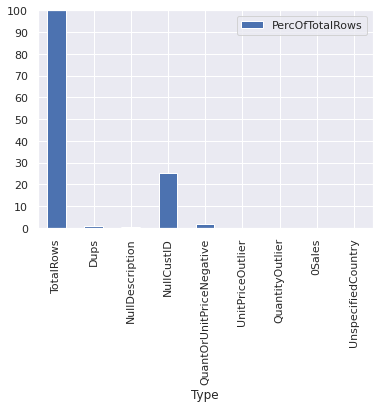

In [67]:
ax=df_data_info.plot(x='Type', y='PercOfTotalRows', kind='bar') 
#ax.set_yscale('log')
ax.set_ylim(0, 100)  # Set the y-axis limits
ax.set_yticks(range(0, 101, 10))
plt.show()

In [68]:
df_cleaned[['Quantity','UnitPrice','Sales']].describe()

Quantity      UnitPrice          Sales
count  524867.000000  524867.000000  524867.000000
mean       10.321093       3.814114      19.699260
std        37.914470      20.158813      86.717175
min         1.000000       0.001000       0.001000
25%         1.000000       1.250000       3.900000
50%         4.000000       2.080000       9.920000
75%        11.000000       4.130000      17.700000
max      4800.000000    2653.950000   38970.000000

## Task4: Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.

In [69]:
df_cleaned.head(5)

Description  Quantity         InvoiceDate  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   UnitPrice         Country  Sales year_quarter day_of_week year_month  
0       2.55  United Kingdom  15.30       2010Q4   Wednesday    2010-12  
1       3.39  United Kingdom  20.34       2010Q4   Wednesday    2010-12  
2       2.75  United Kingdom  22.00       2010Q4   Wednesday    2010-12  
3       3.39  United Kingdom  20.34       2010Q4   Wednesday    2010-12  
4       3.39  United Kingdom  20.34       2010Q4   Wednesday    2010-12

__Total Sales by each Country (Sales = Quantity * UnitPrice)__

- About 84% Total Sales in United Kingdom, 16% in all other countries
- The smallest Total Sales in Saudi Arabia

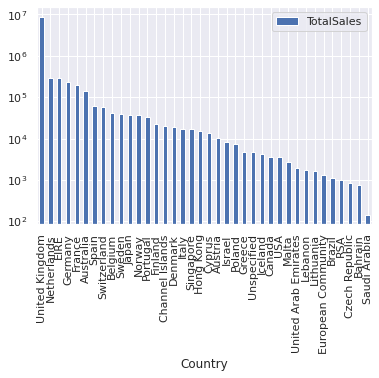

In [70]:
# The Most Total Sales in United Kingdom
# The smallest Total Sales in Saudi Arabia
ax=df_sales_by_country.plot(x='Country', y='TotalSales', kind='bar') 
ax.set_yscale('log')
plt.show()

In [71]:
df_sales_by_country['GrandTotal'] = df_sales_by_country['TotalSales'].sum()
df_sales_by_country['PercOfGrandTotal']=100*df_sales_by_country['TotalSales']/df_sales_by_country['GrandTotal']
df_sales_by_country.head(10)

Country    TotalSales    GrandTotal  PercOfGrandTotal
0  United Kingdom  8.711396e+06  1.033949e+07         84.253623
1     Netherlands  2.854463e+05  1.033949e+07          2.760739
2            EIRE  2.831405e+05  1.033949e+07          2.738438
3         Germany  2.286784e+05  1.033949e+07          2.211699
4          France  2.013032e+05  1.033949e+07          1.946936
5       Australia  1.384538e+05  1.033949e+07          1.339078
6           Spain  6.155856e+04  1.033949e+07          0.595373
7     Switzerland  5.706760e+04  1.033949e+07          0.551938
8         Belgium  4.119634e+04  1.033949e+07          0.398437
9          Sweden  3.836783e+04  1.033949e+07          0.371080

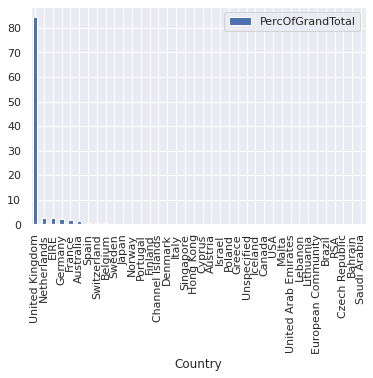

In [72]:
# about 84% Total Sales in United Kingdom, 16% in all other countries
ax=df_sales_by_country.plot(x='Country', y='PercOfGrandTotal', kind='bar') 
plt.show()

- Top 3 selling products based on Sales for each country 

In [73]:
df_sales_by_country_top_product = df_cleaned[['Country','Description','Sales']].groupby(['Country','Description']).sum()
df_sales_by_country_top_product.rename(columns={'Sales': 'TotalProductSales'}, inplace=True)
df_sales_by_country_top_product.sort_values(by=['Country','TotalProductSales'], ascending=[True, False], inplace=True)
df_sales_by_country_top_product.reset_index(inplace=True)
df_sales_by_country_top_product['Rank']=df_sales_by_country_top_product.groupby('Country').cumcount() + 1

# For each country, limit to top 3 purchased products
df_sales_by_country_3top_product = df_sales_by_country_top_product[df_sales_by_country_top_product['Rank'] <=3]
df_sales_by_country_3top_product.reset_index(inplace=True)
print('Shape of df_sales_by_country_3top_product: ',df_sales_by_country_3top_product.shape)

pd.set_option('max_row', None)
df_sales_by_country_3top_product

Shape of df_sales_by_country_3top_product:  (114, 5)


index               Country                          Description  \
0        0             Australia                   RABBIT NIGHT LIGHT   
1        1             Australia    SET OF 6 SPICE TINS PANTRY DESIGN   
2        2             Australia        RED TOADSTOOL LED NIGHT LIGHT   
3      608               Austria                              POSTAGE   
4      609               Austria       PACK OF 6 PANNETONE GIFT BOXES   
5      610               Austria         PACK OF 6 SWEETIE GIFT BOXES   
6      914               Bahrain   OCEAN SCENT CANDLE IN JEWELLED BOX   
7      915               Bahrain           ICE CREAM SUNDAE LIP GLOSS   
8      916               Bahrain                  DOUGHNUT LIP GLOSS    
9      930               Belgium                              POSTAGE   
10     931               Belgium  ROUND SNACK BOXES SET OF4 WOODLAND    
11     932               Belgium                 DOLLY GIRL LUNCH BOX   
12    1714                Brazil             REGENCY CAKESTAND 3 TIER   
13    1715                Brazil    SET OF 6 SPICE TINS PANTRY DESIGN   
14    1716                Brazil   SET/3 RED GINGHAM ROSE STORAGE BOX   
15    1746                Canada                              POSTAGE   
16    1747                Canada           RETRO COFFEE MUGS ASSORTED   
17    1748                Canada              LUNCH BAG  BLACK SKULL.   
18    1893       Channel Islands             REGENCY CAKESTAND 3 TIER   
19    1894       Channel Islands              JUMBO BAG RED RETROSPOT   
20    1895       Channel Islands    SET OF 3 CAKE TINS PANTRY DESIGN    
21    2329                Cyprus   RUSTIC  SEVENTEEN DRAWER SIDEBOARD   
22    2330                Cyprus            EDWARDIAN PARASOL NATURAL   
23    2331                Cyprus   WHITE HANGING HEART T-LIGHT HOLDER   
24    2827        Czech Republic  ROUND SNACK BOXES SET OF4 WOODLAND    
25    2828        Czech Republic  ROTATING SILVER ANGELS T-LIGHT HLDR   
26    2829        Czech Republic           JIGSAW TREE WITH BIRDHOUSE   
27    2852               Denmark                              POSTAGE   
28    2853               Denmark                   RED KITCHEN SCALES   
29    2854               Denmark                 IVORY KITCHEN SCALES   
30    3104                  EIRE             REGENCY CAKESTAND 3 TIER   
31    3105                  EIRE                               Manual   
32    3106                  EIRE                             CARRIAGE   
33    5121    European Community                              POSTAGE   
34    5122    European Community            BISCUIT TIN VINTAGE GREEN   
35    5123    European Community              BISCUIT TIN VINTAGE RED   
36    5171               Finland                              POSTAGE   
37    5172               Finland      CHILDRENS CUTLERY POLKADOT PINK   
38    5173               Finland      CHILDRENS CUTLERY POLKADOT BLUE   
39    5636                France                              POSTAGE   
40    5637                France                   RABBIT NIGHT LIGHT   
41    5638                France             REGENCY CAKESTAND 3 TIER   
42    7200               Germany                              POSTAGE   
43    7201               Germany             REGENCY CAKESTAND 3 TIER   
44    7202               Germany  ROUND SNACK BOXES SET OF4 WOODLAND    
45    8896                Greece                              POSTAGE   
46    8897                Greece             REGENCY CAKESTAND 3 TIER   
47    8898                Greece    VINTAGE CREAM 3 BASKET CAKE STAND   
48    9034             Hong Kong                               Manual   
49    9035             Hong Kong      CHILDRENS CUTLERY POLKADOT PINK   
50    9036             Hong Kong  ROUND SNACK BOXES SET OF4 WOODLAND    
51    9228               Iceland         3D DOG PICTURE PLAYING CARDS   
52    9229               Iceland           ICE CREAM SUNDAE LIP GLOSS   
53    9230               Iceland             REGENCY CAKESTAND 

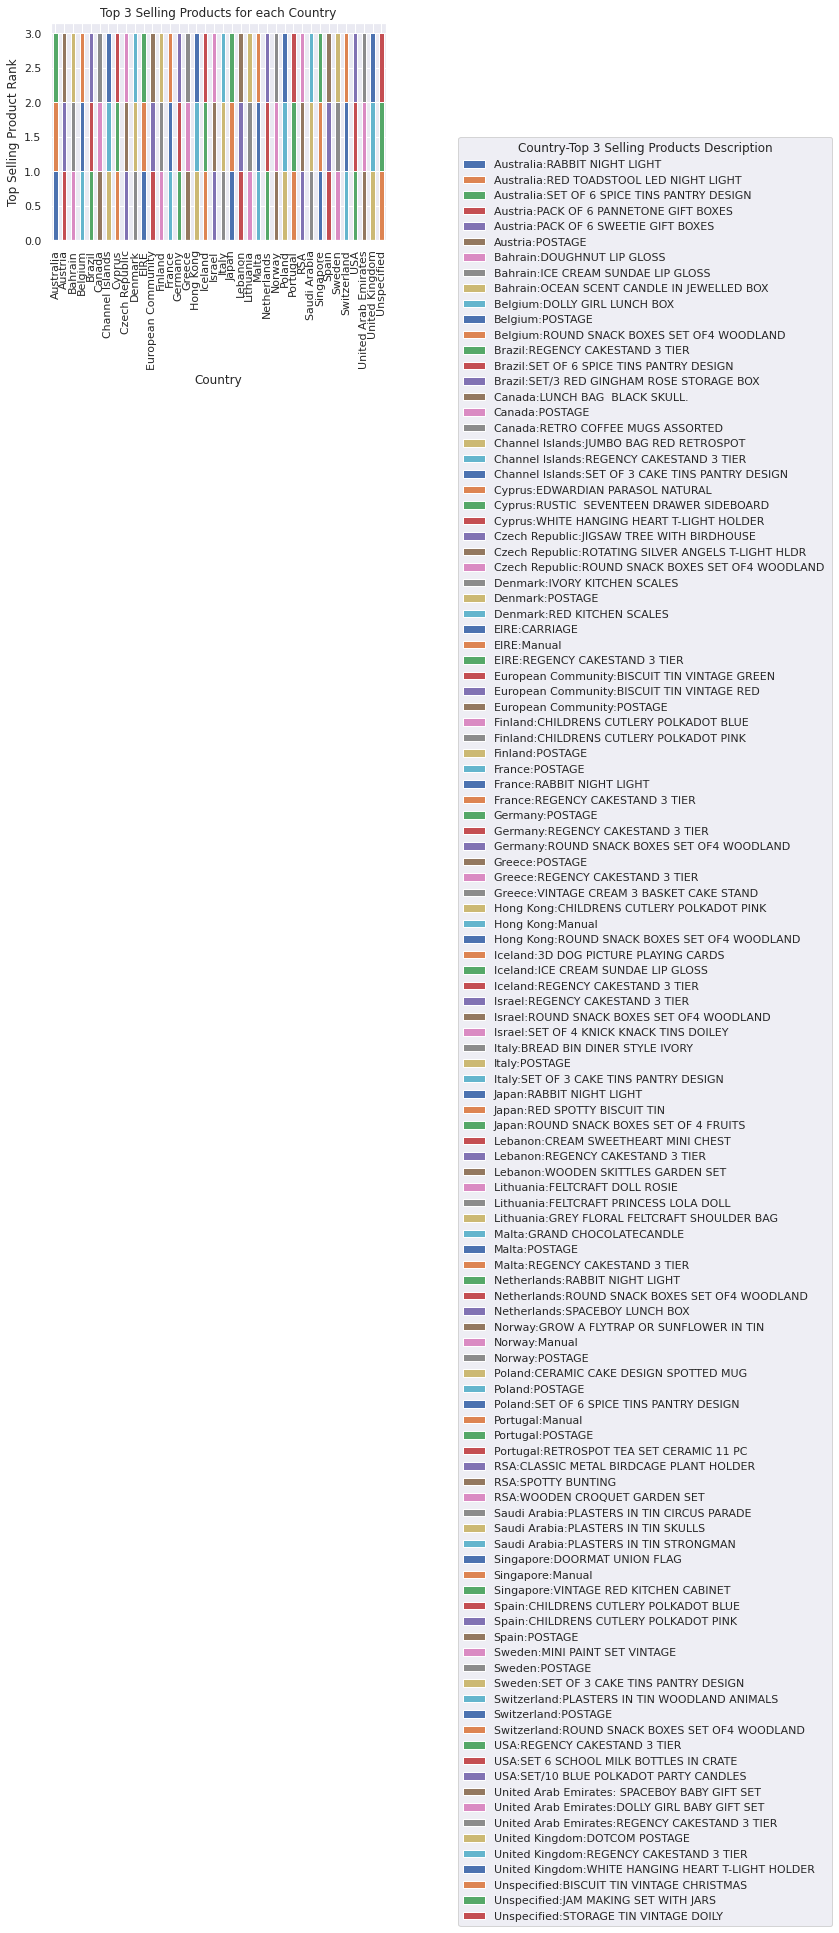

In [74]:
# Count values for each combination of Country and Description
count_df_sales_by_country_3top_product=df_sales_by_country_3top_product.groupby(['Country', 'Description']).size().reset_index(name='Count')
count_df_sales_by_country_3top_product['Country-Description']=count_df_sales_by_country_3top_product['Country']+':'+count_df_sales_by_country_3top_product['Description']

# Pivot the DataFrame for easier plotting
pivot_df_sales_by_country_3top_product = count_df_sales_by_country_3top_product.pivot(index='Country', columns='Country-Description', values='Count')
pivot_df_sales_by_country_3top_product

# Plotting the graph
pivot_df_sales_by_country_3top_product.plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Top Selling Product Rank')
plt.title('Top 3 Selling Products for each Country')
plt.legend(title='Country-Top 3 Selling Products Description',bbox_to_anchor=(1.2, 0.5))
plt.show()

- Top 3 selling products based on quantity for each Country

In [75]:
df_q_by_country_top_product = df_cleaned[['Country','Description','Quantity']].groupby(['Country','Description']).sum()
df_q_by_country_top_product.rename(columns={'Quantity': 'TotalQuantity'}, inplace=True)
df_q_by_country_top_product.sort_values(by=['Country','TotalQuantity'], ascending=[True, False], inplace=True)
df_q_by_country_top_product.reset_index(inplace=True)
df_q_by_country_top_product['Rank']=df_q_by_country_top_product.groupby('Country').cumcount() + 1

# For each country, limit to top 3 purchased products
df_q_by_country_3top_product = df_q_by_country_top_product[df_q_by_country_top_product['Rank'] <=3]
df_q_by_country_3top_product.reset_index(inplace=True)
print('Shape of df_q_by_country_3top_product: ',df_q_by_country_3top_product.shape)

pd.set_option('max_row', None)
df_q_by_country_3top_product

Shape of df_q_by_country_3top_product:  (114, 5)


index               Country                          Description  \
0        0             Australia              MINI PAINT SET VINTAGE    
1        1             Australia                   RABBIT NIGHT LIGHT   
2        2             Australia               RED  HARMONICA IN BOX    
3      608               Austria     SET 12 KIDS COLOUR  CHALK STICKS   
4      609               Austria                   MINI JIGSAW PURDEY   
5      610               Austria       PACK OF 6 PANNETONE GIFT BOXES   
6      914               Bahrain           ICE CREAM SUNDAE LIP GLOSS   
7      915               Bahrain                  DOUGHNUT LIP GLOSS    
8      916               Bahrain   OCEAN SCENT CANDLE IN JEWELLED BOX   
9      930               Belgium      PACK OF 72 RETROSPOT CAKE CASES   
10     931               Belgium  ROUND SNACK BOXES SET OF4 WOODLAND    
11     932               Belgium       PACK OF 60 SPACEBOY CAKE CASES   
12    1714                Brazil                 DOLLY GIRL LUNCH BOX   
13    1715                Brazil      GREEN REGENCY TEACUP AND SAUCER   
14    1716                Brazil       PINK REGENCY TEACUP AND SAUCER   
15    1746                Canada           RETRO COFFEE MUGS ASSORTED   
16    1747                Canada    WORLD WAR 2 GLIDERS ASSTD DESIGNS   
17    1748                Canada         COLOURING PENCILS BROWN TUBE   
18    1893       Channel Islands                         RAIN PONCHO    
19    1894       Channel Islands              JUMBO BAG RED RETROSPOT   
20    1895       Channel Islands       JUMBO  BAG BAROQUE BLACK WHITE   
21    2329                Cyprus       HEART DECORATION PAINTED ZINC    
22    2330                Cyprus        BOYS ALPHABET IRON ON PATCHES   
23    2331                Cyprus      GIRLS ALPHABET IRON ON PATCHES    
24    2827        Czech Republic   WOODEN STAR CHRISTMAS SCANDINAVIAN   
25    2828        Czech Republic   WOODEN TREE CHRISTMAS SCANDINAVIAN   
26    2829        Czech Republic  CHRISTMAS TABLE SILVER CANDLE SPIKE   
27    2852               Denmark               RED  HARMONICA IN BOX    
28    2853               Denmark       SET OF 6 TEA TIME BAKING CASES   
29    2854               Denmark                    GUMBALL COAT RACK   
30    3104                  EIRE      PACK OF 72 RETROSPOT CAKE CASES   
31    3105                  EIRE          60 TEATIME FAIRY CAKE CASES   
32    3106                  EIRE                   VINTAGE SNAP CARDS   
33    5121    European Community       RED ROCKING HORSE HAND PAINTED   
34    5122    European Community       ROCKING HORSE GREEN CHRISTMAS    
35    5123    European Community         ROCKING HORSE RED CHRISTMAS    
36    5171               Finland      CHILDRENS CUTLERY POLKADOT PINK   
37    5172               Finland      CHILDRENS CUTLERY POLKADOT BLUE   
38    5173               Finland                  DOUGHNUT LIP GLOSS    
39    5636                France                   RABBIT NIGHT LIGHT   
40    5637                France              MINI PAINT SET VINTAGE    
41    5638                France        RED TOADSTOOL LED NIGHT LIGHT   
42    7200               Germany  ROUND SNACK BOXES SET OF4 WOODLAND    
43    7201               Germany            ASSORTED COLOURS SILK FAN   
44    7202               Germany                              POSTAGE   
45    8896                Greece  4 LAVENDER BOTANICAL DINNER CANDLES   
46    8897                Greece      4 PEAR BOTANICAL DINNER CANDLES   
47    8898                Greece       SET OF 4 NAPKIN CHARMS CUTLERY   
48    9034             Hong Kong  ROUND SNACK BOXES SET OF4 WOODLAND    
49    9035             Hong Kong    WORLD WAR 2 GLIDERS ASSTD DESIGNS   
50    9036             Hong Kong                   BLUE POLKADOT BOWL   
51    9228               Iceland           ICE CREAM SUNDAE LIP GLOSS   
52    9229               Iceland         3D DOG PICTURE PLAYING CARDS   
53    9230               Iceland              MINI PAINT SET VI

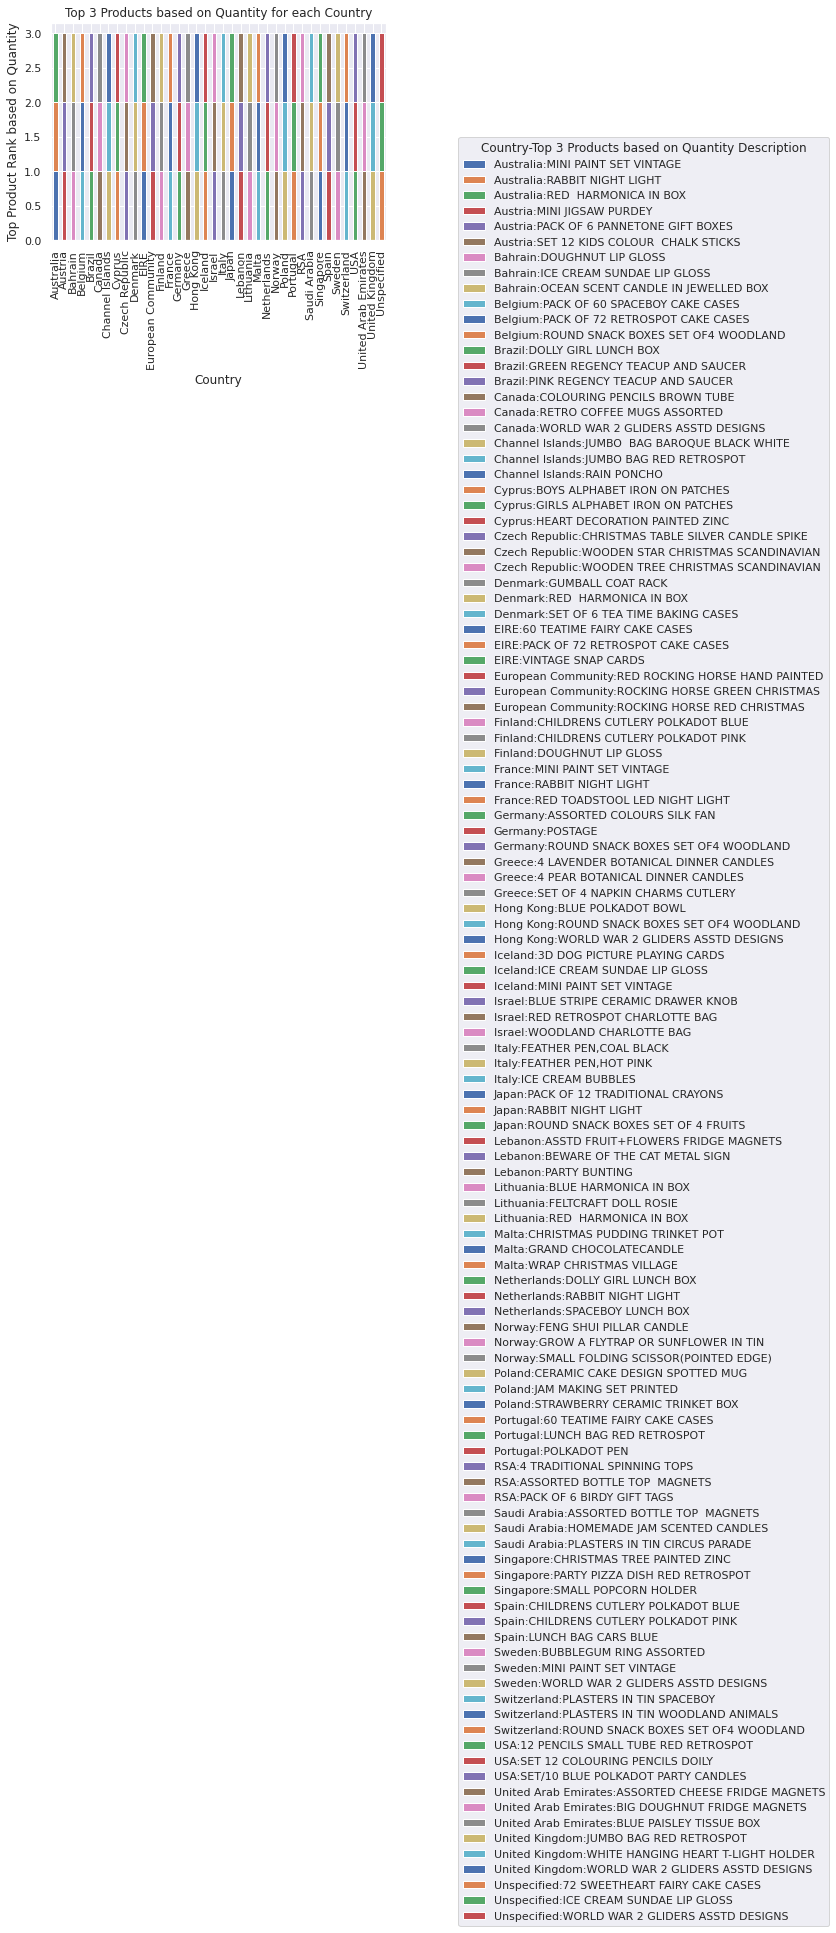

In [76]:
# Count values for each combination of Country and Description
count_df_q_by_country_3top_product=df_q_by_country_3top_product.groupby(['Country', 'Description']).size().reset_index(name='Count')
count_df_q_by_country_3top_product['Country-Description']=count_df_q_by_country_3top_product['Country']+':'+count_df_q_by_country_3top_product['Description']

# Pivot the DataFrame for easier plotting
pivot_df_q_by_country_3top_product = count_df_q_by_country_3top_product.pivot(index='Country', columns='Country-Description', values='Count')
pivot_df_q_by_country_3top_product

# Plotting the graph
pivot_df_q_by_country_3top_product.plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Top Product Rank based on Quantity')
plt.title('Top 3 Products based on Quantity for each Country')
plt.legend(title='Country-Top 3 Products based on Quantity Description',bbox_to_anchor=(1.2, 0.5))
plt.show()

In [77]:
# Total Quantity sold in each Country
df_q_by_country = df_cleaned[['Country','Quantity']].groupby('Country').sum()
df_q_by_country.rename(columns={'Quantity': 'TotalQuantity'}, inplace=True)
df_q_by_country.sort_values(by='TotalQuantity', ascending=False, inplace=True)
df_q_by_country.reset_index(inplace=True)
df_q_by_country.head(40)

Country  TotalQuantity
0         United Kingdom        4491690
1            Netherlands         200361
2                   EIRE         147007
3                Germany         119154
4                 France         112058
5              Australia          83891
6                 Sweden          36078
7            Switzerland          30617
8                  Spain          27933
9                  Japan          26016
10               Belgium          23237
11                Norway          19336
12              Portugal          16231
13               Finland          10704
14       Channel Islands           9485
15               Denmark           8235
16                 Italy           8112
17                Cyprus           6340
18             Singapore           5240
19               Austria           4881
20             Hong Kong           4713
21                Israel           4406
22                Poland           3684
23           Unspecified           3295
24                Canada           2763
25                   USA           2458
26               Iceland           2458
27                Greece           1557
28  United Arab Emirates            982
29                 Malta            970
30        Czech Republic            671
31             Lithuania            652
32    European Community            499
33               Lebanon            386
34                Brazil            356
35                   RSA            351
36               Bahrain            314
37          Saudi Arabia             80

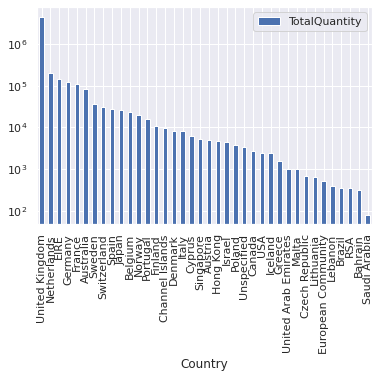

In [78]:
# The largest Total Quantity sold in United Kingdom
# The smallest Total Quantity sold in Saudi Arabia
ax=df_q_by_country.plot(x='Country', y='TotalQuantity', kind='bar') 
ax.set_yscale('log')
plt.show()

In [79]:
df_q_by_country['GrandTotal'] = df_q_by_country['TotalQuantity'].sum()
df_q_by_country['PercOfGrandTotal']=100*df_q_by_country['TotalQuantity']/df_q_by_country['GrandTotal']
df_q_by_country.head(10)

Country  TotalQuantity  GrandTotal  PercOfGrandTotal
0  United Kingdom        4491690     5417201         82.915328
1     Netherlands         200361     5417201          3.698607
2            EIRE         147007     5417201          2.713708
3         Germany         119154     5417201          2.199549
4          France         112058     5417201          2.068559
5       Australia          83891     5417201          1.548604
6          Sweden          36078     5417201          0.665990
7     Switzerland          30617     5417201          0.565181
8           Spain          27933     5417201          0.515635
9           Japan          26016     5417201          0.480248

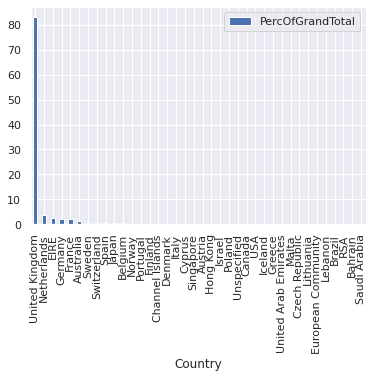

In [80]:
# about 83% Total Quantity sold in United Kingdom, 17% in all other countries and this agrees with 84% and 16% based on Sales
ax=df_q_by_country.plot(x='Country', y='PercOfGrandTotal', kind='bar') 
plt.show()

- Total Sales by Country and Quarter

In [81]:
# Total Sales by Country and Quarter
df_sales_by_country_q = df_cleaned[['Country','year_quarter','Sales']].groupby(['Country','year_quarter']).sum()
df_sales_by_country_q.rename(columns={'Sales': 'TotalQuarterSales'}, inplace=True)
df_sales_by_country_q.sort_values(by=['Country','year_quarter'], ascending=True, inplace=True)
df_sales_by_country_q.reset_index(inplace=True)
df_sales_by_country_q.head(200)

Country year_quarter  TotalQuarterSales
0               Australia       2010Q4       9.653500e+02
1               Australia       2011Q1       4.093712e+04
2               Australia       2011Q2       3.959778e+04
3               Australia       2011Q3       3.256031e+04
4               Australia       2011Q4       2.439325e+04
5                 Austria       2010Q4       2.772000e+02
6                 Austria       2011Q1       2.226480e+03
7                 Austria       2011Q2       1.930210e+03
8                 Austria       2011Q3       2.708030e+03
9                 Austria       2011Q4       3.056760e+03
10                Bahrain       2010Q4       2.057400e+02
11                Bahrain       2011Q2       5.484000e+02
12                Belgium       2010Q4       1.809910e+03
13                Belgium       2011Q1       6.733250e+03
14                Belgium       2011Q2       8.996700e+03
15                Belgium       2011Q3       1.023761e+04
16                Belgium       2011Q4       1.341887e+04
17                 Brazil       2011Q2       1.143600e+03
18                 Canada       2011Q1       1.405400e+02
19                 Canada       2011Q2       1.705700e+03
20                 Canada       2011Q3       1.820140e+03
21        Channel Islands       2010Q4       3.635300e+02
22        Channel Islands       2011Q1       5.969620e+03
23        Channel Islands       2011Q2       3.560270e+03
24        Channel Islands       2011Q3       6.210630e+03
25        Channel Islands       2011Q4       4.336490e+03
26                 Cyprus       2010Q4       1.587070e+03
27                 Cyprus       2011Q1       5.820130e+03
28                 Cyprus       2011Q2       1.109320e+03
29                 Cyprus       2011Q3       1.963500e+02
30                 Cyprus       2011Q4       4.789980e+03
31         Czech Republic       2011Q1       5.492600e+02
32         Czech Republic       2011Q4       2.774800e+02
33                Denmark       2010Q4       1.281500e+03
34                Denmark       2011Q1       4.378210e+03
35                Denmark       2011Q2       3.776850e+03
36                Denmark       2011Q3       5.159550e+03
37                Denmark       2011Q4       4.359230e+03
38                   EIRE       2010Q4       1.003326e+04
39                   EIRE       2011Q1       5.630544e+04
40                   EIRE       2011Q2       5.043783e+04
41                   EIRE       2011Q3       1.040067e+05
42                   EIRE       2011Q4       6.235724e+04
43     European Community       2011Q2       6.234500e+02
44     European Community       2011Q3       6.768000e+02
45                Finland       2010Q4       8.928000e+02
46                Finland       2011Q1       7.031000e+03
47                Finland       2011Q2       2.018480e+03
48                Finland       2011Q3       5.478680e+03
49                Finland       2011Q4       7.125120e+03
50                 France       2010Q4       9.616310e+03
51                 France       2011Q1       4.084103e+04
52                 France       2011Q2       3.948450e+04
53                 France       2011Q3       4.723919e+04
54                 France       2011Q4       6.412222e+04
55                Germany       2010Q4       1.520574e+04
56                Germany       2011Q1       4.085458e+04
57                Germany       2011Q2       5.129659e+04
58                Germany       2011Q3       5.374122e+04
59                Germany       2011Q4       6.758027e+04
60                 Greece       2011Q1       3.048550e+03
61                 Greece       2011Q2       6.097400e+02
62                 Greece       2011Q3       4.212400e+02
63                 Greece       2011Q4       6.809900e+02
64              Hong Kong       2011Q1       4.814720e+03
65              Hong Kong       2011Q2       4.139760e+03
66              Hong Kong       2011Q3       5.467900e+03
67              Hong Kong       2011Q4       1.060620e+03
68              

In [82]:
# Transpose by Country and year_quarter
df_sales_by_country_q_pivot = df_sales_by_country_q.pivot(index='Country', columns='year_quarter', values='TotalQuarterSales')
df_sales_by_country_q_pivot['TotalSales']=df_sales_by_country_q_pivot['2010Q4'].fillna(0)+df_sales_by_country_q_pivot['2011Q1'].fillna(0)+df_sales_by_country_q_pivot['2011Q2'].fillna(0)+df_sales_by_country_q_pivot['2011Q3'].fillna(0)+df_sales_by_country_q_pivot['2011Q4'].fillna(0)
df_sales_by_country_q_pivot.sort_values(by='TotalSales', ascending=False, inplace=True)
df_sales_by_country_q_pivot.head(40)

year_quarter             2010Q4      2011Q1       2011Q2       2011Q3  \
Country                                                                 
United Kingdom        732540.89  1496589.63  1723985.301  2082947.783   
Netherlands             8784.48    72039.56    59020.530    67291.090   
EIRE                   10033.26    56305.44    50437.830   104006.750   
Germany                15205.74    40854.58    51296.590    53741.220   
France                  9616.31    40841.03    39484.500    47239.190   
Australia                965.35    40937.12    39597.780    32560.310   
Spain                   1843.73    17563.74     8376.460    16152.420   
Switzerland             1304.92     8756.38    13591.100    17245.510   
Belgium                 1809.91     6733.25     8996.700    10237.610   
Sweden                  3834.30     8716.40     4323.080    12767.660   
Japan                   7705.07     5829.71     9506.990     3966.480   
Norway                  3787.12     1896.21     5886.860    11594.820   
Portugal                2439.97     7930.46     6774.440     4942.470   
Finland                  892.80     7031.00     2018.480     5478.680   
Channel Islands          363.53     5969.62     3560.270     6210.630   
Denmark                 1281.50     4378.21     3776.850     5159.550   
Italy                    811.50     4465.32     1527.350     2417.850   
Singapore                   NaN     2053.07     8209.580     3949.320   
Hong Kong                   NaN     4814.72     4139.760     5467.900   
Cyprus                  1587.07     5820.13     1109.320      196.350   
Austria                  277.20     2226.48     1930.210     2708.030   
Israel                      NaN     1158.94      110.000     6728.290   
Poland                   248.16     1535.05     2571.860     1618.350   
Greece                      NaN     3048.55      609.740      421.240   
Unspecified                 NaN         NaN     1540.750     2234.440   
Iceland                  711.79      475.39     1018.770      584.910   
Canada                      NaN      140.54     1705.700     1820.140   
USA                         NaN         NaN      383.950          NaN   
Malta                       NaN         NaN      863.160     1119.000   
United Arab Emirates        NaN      889.24          NaN     1013.040   
Lebanon                     NaN     1693.88          NaN          NaN   
Lithuania               1661.06         NaN          NaN          NaN   
European Community          NaN         NaN      623.450      676.800   
Brazil                      NaN         NaN     1143.600          NaN   
RSA                         NaN         NaN          NaN          NaN   
Czech Republic              NaN      549.26          NaN          NaN   
Bahrain                  205.74         NaN      548.400          NaN   
Saudi Arabia                NaN      145.92          NaN          NaN   

year_quarter                2011Q4    TotalSales  
Country                                           
United Kingdom        2.675332e+06  8.711396e+06  
Netherlands           7.831068e+04  2.854463e+05  
EIRE                  6.235724e+04  2.831405e+05  
Germany               6.758027e+04  2.286784e+05  
France                6.412222e+04  2.013033e+05  
Australia             2.439325e+04  1.384538e+05  
Spain                 1.762221e+04  6.155856e+04  
Switzerland           1.616969e+04  5.706760e+04  
Belgium               1.341887e+04  4.119634e+04  
Sweden                8.726390e+03  3.836783e+04  
Japan                 1.040812e+04  3.741637e+04  
Norway                1.300043e+04  3.616544e+04  
Portugal              1.159571e+04  3.368305e+04  
Finland               7.125120e+03  2.254608e+04  
Channel Islands       4.336490e+03  2.044054e+04  
Denmark               4.359230e+03  1.895534e+04  
Italy                 8.261220e+03  1.748324e+04  
Singapore             3.118000e+03  1.732997e+04  
Hong Kong             1.060620e+03  1.548300e+04  
Cyprus  

__Total Sales by top 4 Countries and year_quarter__

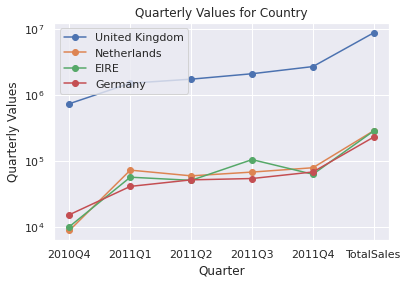

In [83]:
# Plotting each row
for index, row in df_sales_by_country_q_pivot.head(4).iterrows():
    plt.plot(row.index, row.values, marker='o', label=index)

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Quarterly Values')
plt.title('Quarterly Values for Country')
plt.legend()
plt.grid(True)
plt.yscale('log')

# Display the plot
plt.show()

__Total Sales by next 5 Countries and year_quarter__

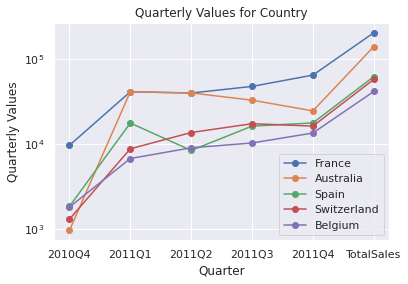

In [84]:
# Plotting each row
for index, row in df_sales_by_country_q_pivot.iloc[4:9].iterrows():
    plt.plot(row.index, row.values, marker='o', label=index)

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Quarterly Values')
plt.title('Quarterly Values for Country')
plt.legend()
plt.grid(True)
plt.yscale('log')

# Display the plot
plt.show()

__Total Sales by all Countries and year_quarter__

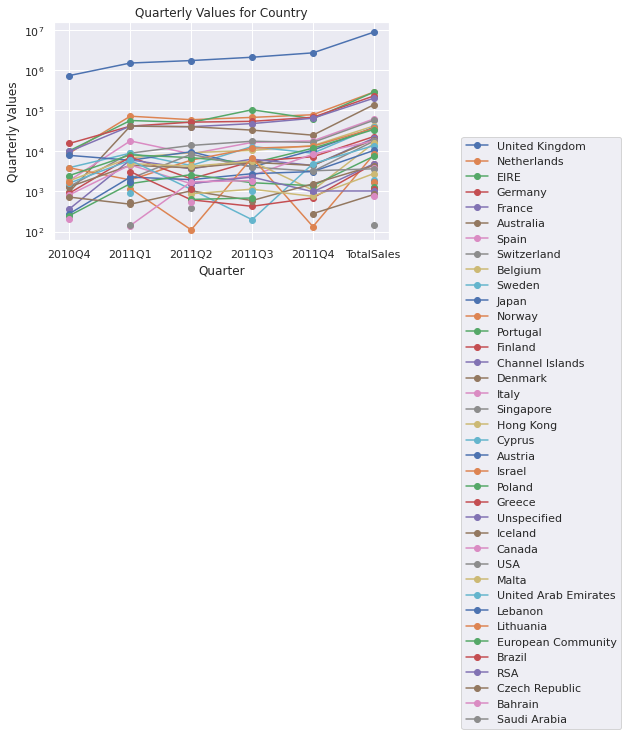

In [85]:
# Plotting each row
for index, row in df_sales_by_country_q_pivot.iterrows():
    plt.plot(row.index, row.values, marker='o', label=index)

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Quarterly Values')
plt.title('Quarterly Values for Country')
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.grid(True)
plt.yscale('log')

# Display the plot
plt.show()

- Total Sales by Country and Month

In [86]:
# Total Sales by Country and Month
df_sales_by_country_m = df_cleaned[['Country','year_month','Sales']].groupby(['Country','year_month']).sum()
df_sales_by_country_m.rename(columns={'Sales': 'TotalMonthlySales'}, inplace=True)
df_sales_by_country_m.sort_values(by=['Country','year_month'], ascending=True, inplace=True)
df_sales_by_country_m.reset_index(inplace=True)
df_sales_by_country_m.head(200)

Country year_month  TotalMonthlySales
0             Australia    2010-12             965.35
1             Australia    2011-01            9017.71
2             Australia    2011-02           14695.42
3             Australia    2011-03           17223.99
4             Australia    2011-04             771.60
5             Australia    2011-05           13638.41
6             Australia    2011-06           25187.77
7             Australia    2011-07            4964.38
8             Australia    2011-08           22489.20
9             Australia    2011-09            5106.73
10            Australia    2011-10           17150.53
11            Australia    2011-11            7242.72
12              Austria    2010-12             277.20
13              Austria    2011-02             518.36
14              Austria    2011-03            1708.12
15              Austria    2011-04             680.78
16              Austria    2011-05            1249.43
17              Austria    2011-07            1191.95
18              Austria    2011-08            1516.08
19              Austria    2011-10            1043.78
20              Austria    2011-11            1329.78
21              Austria    2011-12             683.20
22              Bahrain    2010-12             205.74
23              Bahrain    2011-05             548.40
24              Belgium    2010-12            1809.91
25              Belgium    2011-01            1200.20
26              Belgium    2011-02            2181.07
27              Belgium    2011-03            3351.98
28              Belgium    2011-04            1989.48
29              Belgium    2011-05            2732.40
30              Belgium    2011-06            4274.82
31              Belgium    2011-07            2475.57
32              Belgium    2011-08            3554.02
33              Belgium    2011-09            4208.02
34              Belgium    2011-10            5685.38
35              Belgium    2011-11            6315.76
36              Belgium    2011-12            1417.73
37               Brazil    2011-04            1143.60
38               Canada    2011-03             140.54
39               Canada    2011-05             534.24
40               Canada    2011-06            1171.46
41               Canada    2011-07            1768.58
42               Canada    2011-08              51.56
43      Channel Islands    2010-12             363.53
44      Channel Islands    2011-01             675.58
45      Channel Islands    2011-02            1784.71
46      Channel Islands    2011-03            3509.33
47      Channel Islands    2011-04             293.00
48      Channel Islands    2011-05            1207.24
49      Channel Islands    2011-06            2060.03
50      Channel Islands    2011-08            4886.88
51      Channel Islands    2011-09            1323.75
52      Channel Islands    2011-10            2623.32
53      Channel Islands    2011-11            1514.77
54      Channel Islands    2011-12             198.40
55               Cyprus    2010-12            1587.07
56               Cyprus    2011-01             547.50
57               Cyprus    2011-02            4334.24
58               Cyprus    2011-03             938.39
59               Cyprus    2011-06            1109.32
60               Cyprus    2011-09             196.35
61               Cyprus    2011-10            4350.32
62               Cyprus    2011-11             439.66
63       Czech Republic    2011-02             549.26
64       Czech Republic    2011-10             277.48
65              Denmark    2010-12            1281.50
66              Denmark    2011-02             399.22
67              Denmark    2011-03            3978.99
68              Denmark    2011-05             515.70
69              Denmark    2011-06            3261.15
70              Denmark    2011-07             376.24
71              Denmark    2011-08             213.15
72              Denmark    2011-09            4570.16
73              Denm

- United Kingdom

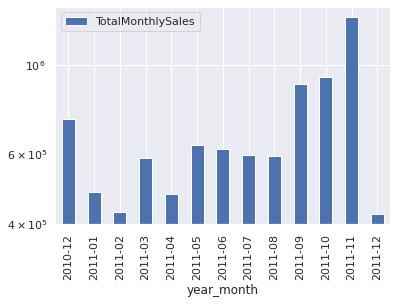

In [87]:
ax=df_sales_by_country_m[df_sales_by_country_m['Country']=='United Kingdom'].plot(x='year_month', y='TotalMonthlySales', kind='bar') 
ax.set_yscale('log')
plt.show()

- Netherlands

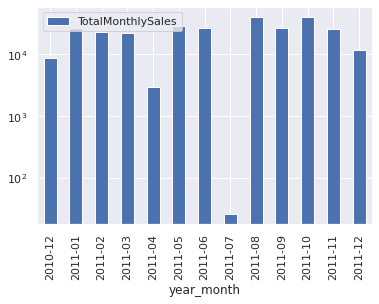

In [88]:
ax=df_sales_by_country_m[df_sales_by_country_m['Country']=='Netherlands'].plot(x='year_month', y='TotalMonthlySales', kind='bar') 
ax.set_yscale('log')
plt.show()

- EIRE

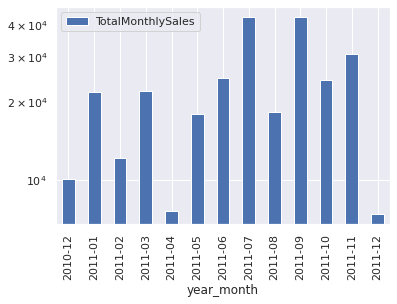

In [89]:
ax=df_sales_by_country_m[df_sales_by_country_m['Country']=='EIRE'].plot(x='year_month', y='TotalMonthlySales', kind='bar') 
ax.set_yscale('log')
plt.show()

- Germany

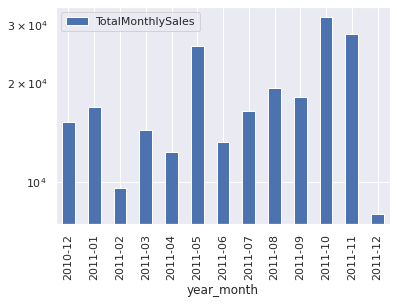

In [90]:
ax=df_sales_by_country_m[df_sales_by_country_m['Country']=='Germany'].plot(x='year_month', y='TotalMonthlySales', kind='bar') 
ax.set_yscale('log')
plt.show()

- Identify the busiest months in terms of sales

In [91]:
df_sales_by_month = df_cleaned[['year_month','Sales']].groupby(['year_month']).sum()
df_sales_by_month.rename(columns={'Sales': 'TotalMonthlySales'}, inplace=True)
df_sales_by_month.sort_values(by=['year_month','TotalMonthlySales'], ascending=[True, True], inplace=True)
df_sales_by_month.reset_index(inplace=True)
df_sales_by_month.head(200)

year_month  TotalMonthlySales
0     2010-12         807911.400
1     2011-01         612628.010
2     2011-02         522545.560
3     2011-03         716215.260
4     2011-04         536968.491
5     2011-05         761153.860
6     2011-06         760547.010
7     2011-07         713788.491
8     2011-08         742274.150
9     2011-09        1056435.192
10    2011-10        1135836.340
11    2011-11        1503866.780
12    2011-12         469320.730

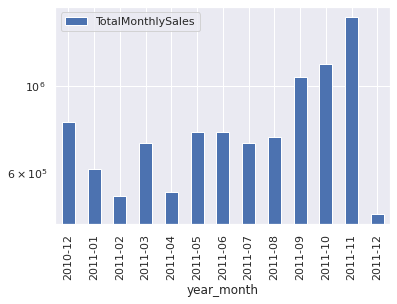

In [92]:
ax=df_sales_by_month.plot(x='year_month', y='TotalMonthlySales', kind='bar') 
ax.set_yscale('log')
plt.show()

In [93]:
# The busiest months in terms of Quantity
df_q_by_month = df_cleaned[['year_month','Quantity']].groupby(['year_month']).sum()
df_q_by_month.rename(columns={'Quantity': 'TotalMonthlyQuantity'}, inplace=True)
df_q_by_month.sort_values(by=['year_month','TotalMonthlyQuantity'], ascending=[True, True], inplace=True)
df_q_by_month.reset_index(inplace=True)
df_q_by_month.head(200)

year_month  TotalMonthlyQuantity
0     2010-12                358018
1     2011-01                312884
2     2011-02                282934
3     2011-03                376599
4     2011-04                307953
5     2011-05                395000
6     2011-06                388511
7     2011-07                399692
8     2011-08                421018
9     2011-09                569573
10    2011-10                621025
11    2011-11                751377
12    2011-12                232617

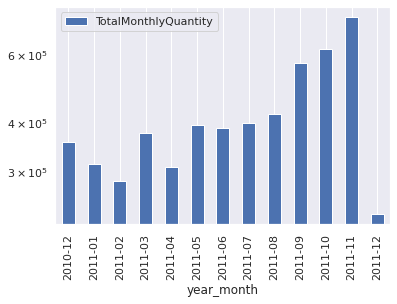

In [94]:
ax=df_q_by_month.plot(x='year_month', y='TotalMonthlyQuantity', kind='bar') 
ax.set_yscale('log')
plt.show()

- Identify the busiest days of the week in terms of sales

In [95]:
df_sales_by_weekdays = df_cleaned[['year_quarter','day_of_week', 'Sales']].groupby(['year_quarter','day_of_week']).sum()
df_sales_by_weekdays.rename(columns={'Sales': 'TotalDayOfWeekSales'}, inplace=True)
df_sales_by_weekdays.sort_values(by=['year_quarter','TotalDayOfWeekSales','day_of_week'], ascending=[True, False, True], inplace=True)
df_sales_by_weekdays.reset_index(inplace=True)
df_sales_by_weekdays.head(200)

year_quarter day_of_week  TotalDayOfWeekSales
0        2010Q4     Tuesday           178459.970
1        2010Q4    Thursday           162363.660
2        2010Q4      Friday           151257.780
3        2010Q4   Wednesday           140596.490
4        2010Q4      Monday           119332.750
5        2010Q4      Sunday            55900.750
6        2011Q1     Tuesday           431610.970
7        2011Q1    Thursday           366385.440
8        2011Q1      Friday           318292.140
9        2011Q1      Monday           311525.610
10       2011Q1   Wednesday           311019.990
11       2011Q1      Sunday           112554.680
12       2011Q2    Thursday           453239.760
13       2011Q2     Tuesday           439716.010
14       2011Q2   Wednesday           372953.110
15       2011Q2      Friday           320605.051
16       2011Q2      Monday           308386.210
17       2011Q2      Sunday           163769.220
18       2011Q3    Thursday           614239.050
19       2011Q3     Tuesday           499315.701
20       2011Q3   Wednesday           442333.020
21       2011Q3      Monday           365091.821
22       2011Q3      Friday           364737.020
23       2011Q3      Sunday           226781.221
24       2011Q4      Monday           664002.100
25       2011Q4    Thursday           590237.370
26       2011Q4   Wednesday           576222.450
27       2011Q4     Tuesday           527730.180
28       2011Q4      Friday           503046.840
29       2011Q4      Sunday           247784.910

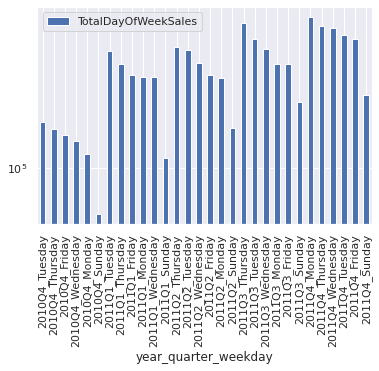

In [96]:
df_sales_by_weekdays['year_quarter_weekday']=df_sales_by_weekdays['year_quarter']+'_'+df_sales_by_weekdays['day_of_week']
ax=df_sales_by_weekdays.plot(x='year_quarter_weekday', y='TotalDayOfWeekSales', kind='bar') 
ax.set_yscale('log')
plt.show()

In [97]:
# Identify the busiest days of the week in terms of Quantity
df_q_by_weekdays = df_cleaned[['year_quarter','day_of_week', 'Quantity']].groupby(['year_quarter','day_of_week']).sum()
df_q_by_weekdays.rename(columns={'Quantity': 'TotalDayOfWeekQuantity'}, inplace=True)
df_q_by_weekdays.sort_values(by=['year_quarter','TotalDayOfWeekQuantity','day_of_week'], ascending=[True, False, True], inplace=True)
df_q_by_weekdays.reset_index(inplace=True)
df_q_by_weekdays.head(200)

year_quarter day_of_week  TotalDayOfWeekQuantity
0        2010Q4    Thursday                   86774
1        2010Q4   Wednesday                   71392
2        2010Q4     Tuesday                   61039
3        2010Q4      Monday                   54234
4        2010Q4      Friday                   54066
5        2010Q4      Sunday                   30513
6        2011Q1     Tuesday                  216796
7        2011Q1    Thursday                  200557
8        2011Q1   Wednesday                  173740
9        2011Q1      Friday                  160481
10       2011Q1      Monday                  158955
11       2011Q1      Sunday                   61888
12       2011Q2    Thursday                  250312
13       2011Q2   Wednesday                  223424
14       2011Q2     Tuesday                  217394
15       2011Q2      Monday                  152250
16       2011Q2      Friday                  150962
17       2011Q2      Sunday                   97122
18       2011Q3    Thursday                  349677
19       2011Q3     Tuesday                  263994
20       2011Q3   Wednesday                  243859
21       2011Q3      Friday                  197270
22       2011Q3      Monday                  196779
23       2011Q3      Sunday                  138704
24       2011Q4    Thursday                  320061
25       2011Q4   Wednesday                  312677
26       2011Q4      Monday                  308928
27       2011Q4     Tuesday                  279647
28       2011Q4      Friday                  246424
29       2011Q4      Sunday                  137282

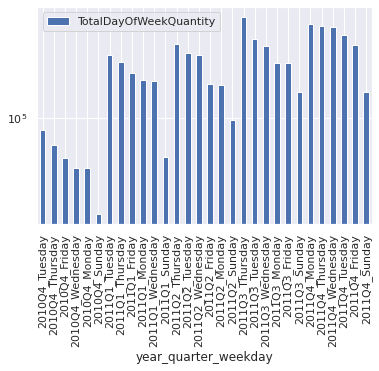

In [98]:
df_q_by_weekdays['year_quarter_weekday']=df_sales_by_weekdays['year_quarter']+'_'+df_sales_by_weekdays['day_of_week']
ax=df_q_by_weekdays.plot(x='year_quarter_weekday', y='TotalDayOfWeekQuantity', kind='bar') 
ax.set_yscale('log')
plt.show()

## Task5: Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.

- Total Sales by top 4 Countries and year_quarter

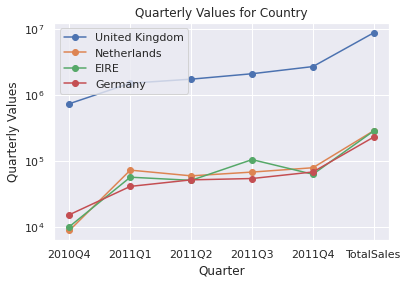

In [99]:
# About 84% Total Sales in United Kingdom, 16% in all other countries
# Top 4 Countries: United Kingdom, Netherlands, EIRE, and Germany.
# The smallest Total Sales in Saudi Arabia

# Plotting each row
for index, row in df_sales_by_country_q_pivot.head(4).iterrows():
    plt.plot(row.index, row.values, marker='o', label=index)

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Quarterly Values')
plt.title('Quarterly Values for Country')
plt.legend()
plt.grid(True)
plt.yscale('log')

# Display the plot
plt.show()

- Total Sales by next 5 Countries and year_quarter

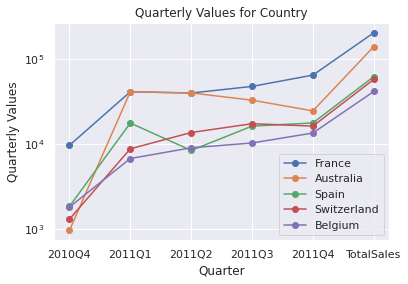

In [100]:
# Plotting each row
for index, row in df_sales_by_country_q_pivot.iloc[4:9].iterrows():
    plt.plot(row.index, row.values, marker='o', label=index)

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Quarterly Values')
plt.title('Quarterly Values for Country')
plt.legend()
plt.grid(True)
plt.yscale('log')

# Display the plot
plt.show()

- Total Sales by all Countries and year_quarter

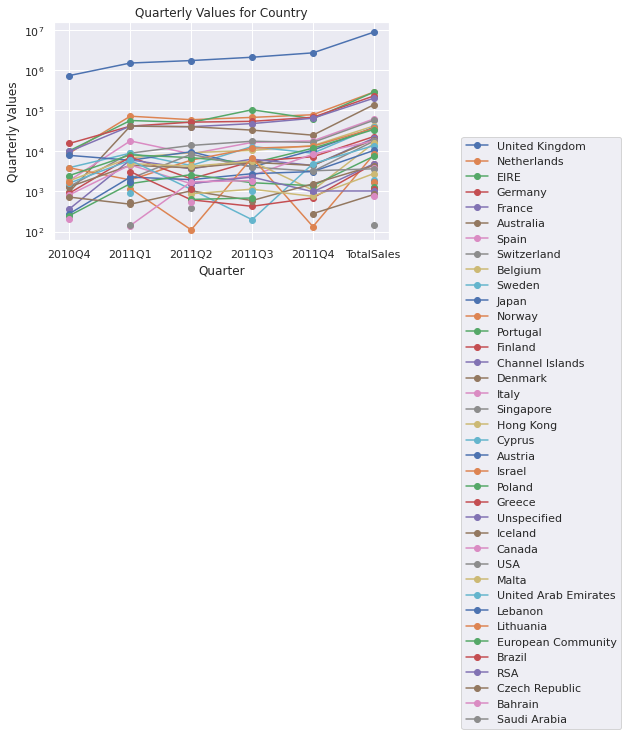

In [101]:
# Plotting each row
for index, row in df_sales_by_country_q_pivot.iterrows():
    plt.plot(row.index, row.values, marker='o', label=index)

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Quarterly Values')
plt.title('Quarterly Values for Country')
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.grid(True)
plt.yscale('log')

# Display the plot
plt.show()

- The least Sales by last 10  countries based on the TotalSales

In [102]:
df_sales_by_country_q_pivot.tail(10)

year_quarter           2010Q4   2011Q1   2011Q2   2011Q3   2011Q4  TotalSales
Country                                                                      
Malta                     NaN      NaN   863.16  1119.00   743.43     2725.59
United Arab Emirates      NaN   889.24      NaN  1013.04      NaN     1902.28
Lebanon                   NaN  1693.88      NaN      NaN      NaN     1693.88
Lithuania             1661.06      NaN      NaN      NaN      NaN     1661.06
European Community        NaN      NaN   623.45   676.80      NaN     1300.25
Brazil                    NaN      NaN  1143.60      NaN      NaN     1143.60
RSA                       NaN      NaN      NaN      NaN  1002.31     1002.31
Czech Republic            NaN   549.26      NaN      NaN   277.48      826.74
Bahrain                205.74      NaN   548.40      NaN      NaN      754.14
Saudi Arabia              NaN   145.92      NaN      NaN      NaN      145.92

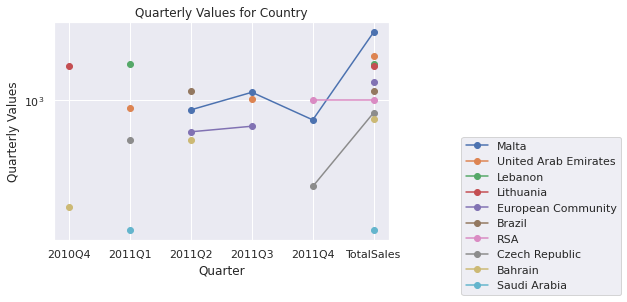

In [103]:
# Plotting each row
for index, row in df_sales_by_country_q_pivot.tail(10).iterrows():
    plt.plot(row.index, row.values, marker='o', label=index)

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Quarterly Values')
plt.title('Quarterly Values for Country')
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.grid(True)
plt.yscale('log')

# Display the plot
plt.show()

- Identify the busiest months in terms of sales: Sep, Oct, Nov

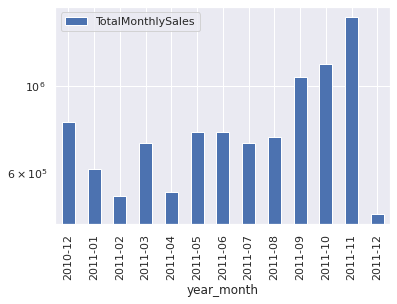

In [104]:
ax=df_sales_by_month.plot(x='year_month', y='TotalMonthlySales', kind='bar') 
ax.set_yscale('log')
plt.show()

- The busiest months in terms of Quantity: Sep, Oct, Nov

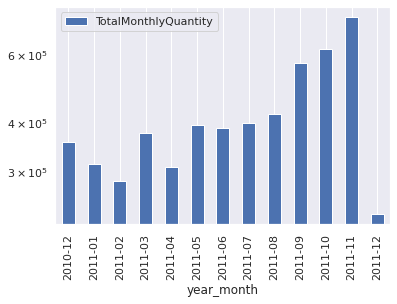

In [105]:
ax=df_q_by_month.plot(x='year_month', y='TotalMonthlyQuantity', kind='bar') 
ax.set_yscale('log')
plt.show()

- Identify the busiest days of the week in terms of sales: Mon, Tue, Wed, Thr

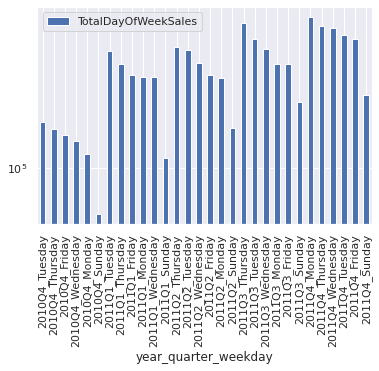

In [106]:
# the least busy day: Sun
df_sales_by_weekdays['year_quarter_weekday']=df_sales_by_weekdays['year_quarter']+'_'+df_sales_by_weekdays['day_of_week']
ax=df_sales_by_weekdays.plot(x='year_quarter_weekday', y='TotalDayOfWeekSales', kind='bar') 
ax.set_yscale('log')
plt.show()

- Identify the busiest days of the week in terms of Quantity: Mon, Tue, Wed, Thr

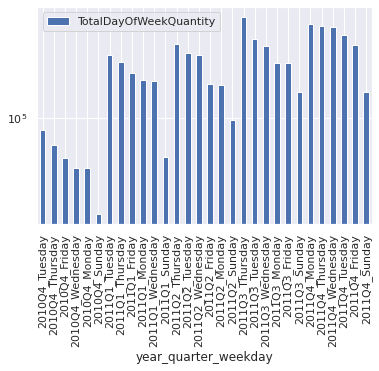

In [107]:
# the least busy day: Sun
df_q_by_weekdays['year_quarter_weekday']=df_sales_by_weekdays['year_quarter']+'_'+df_sales_by_weekdays['day_of_week']
ax=df_q_by_weekdays.plot(x='year_quarter_weekday', y='TotalDayOfWeekQuantity', kind='bar') 
ax.set_yscale('log')
plt.show()

## Task6: Explore the top-selling products and countries based on the quantity sold.

- Top 3 selling products based on quantity for each Country

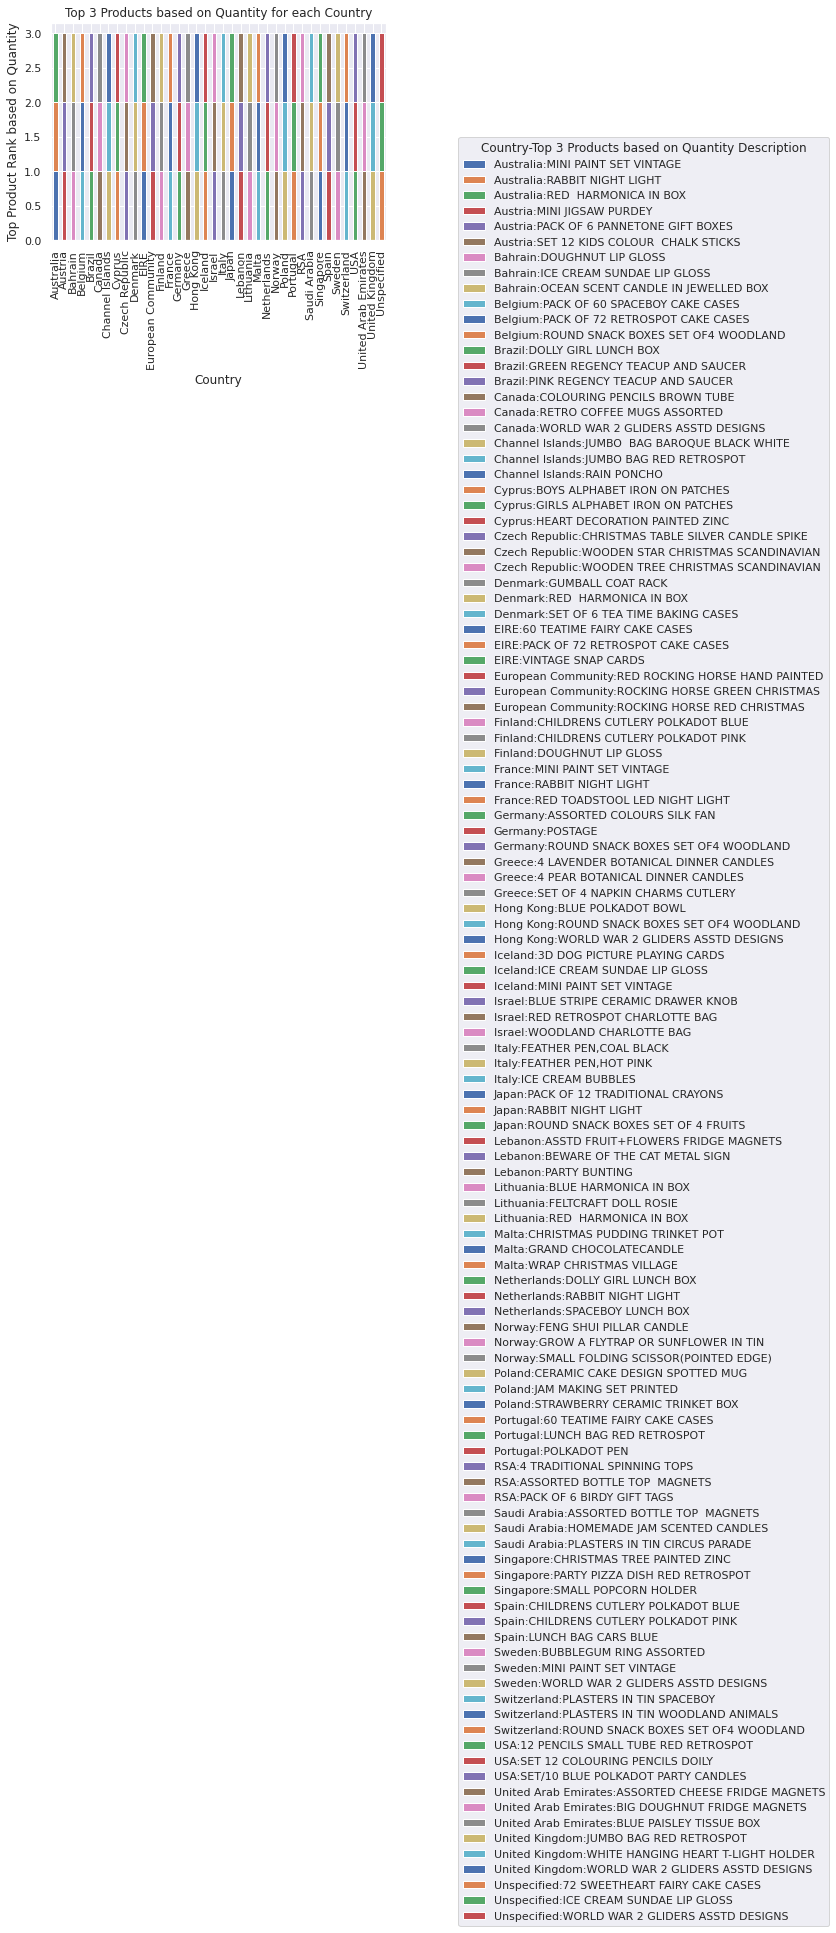

In [108]:
# Count values for each combination of Country and Description
count_df_q_by_country_3top_product=df_q_by_country_3top_product.groupby(['Country', 'Description']).size().reset_index(name='Count')
count_df_q_by_country_3top_product['Country-Description']=count_df_q_by_country_3top_product['Country']+':'+count_df_q_by_country_3top_product['Description']

# Pivot the DataFrame for easier plotting
pivot_df_q_by_country_3top_product = count_df_q_by_country_3top_product.pivot(index='Country', columns='Country-Description', values='Count')
pivot_df_q_by_country_3top_product

# Plotting the graph
pivot_df_q_by_country_3top_product.plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Top Product Rank based on Quantity')
plt.title('Top 3 Products based on Quantity for each Country')
plt.legend(title='Country-Top 3 Products based on Quantity Description',bbox_to_anchor=(1.2, 0.5))
plt.show()

- Top 3 selling products based on Sales for each country

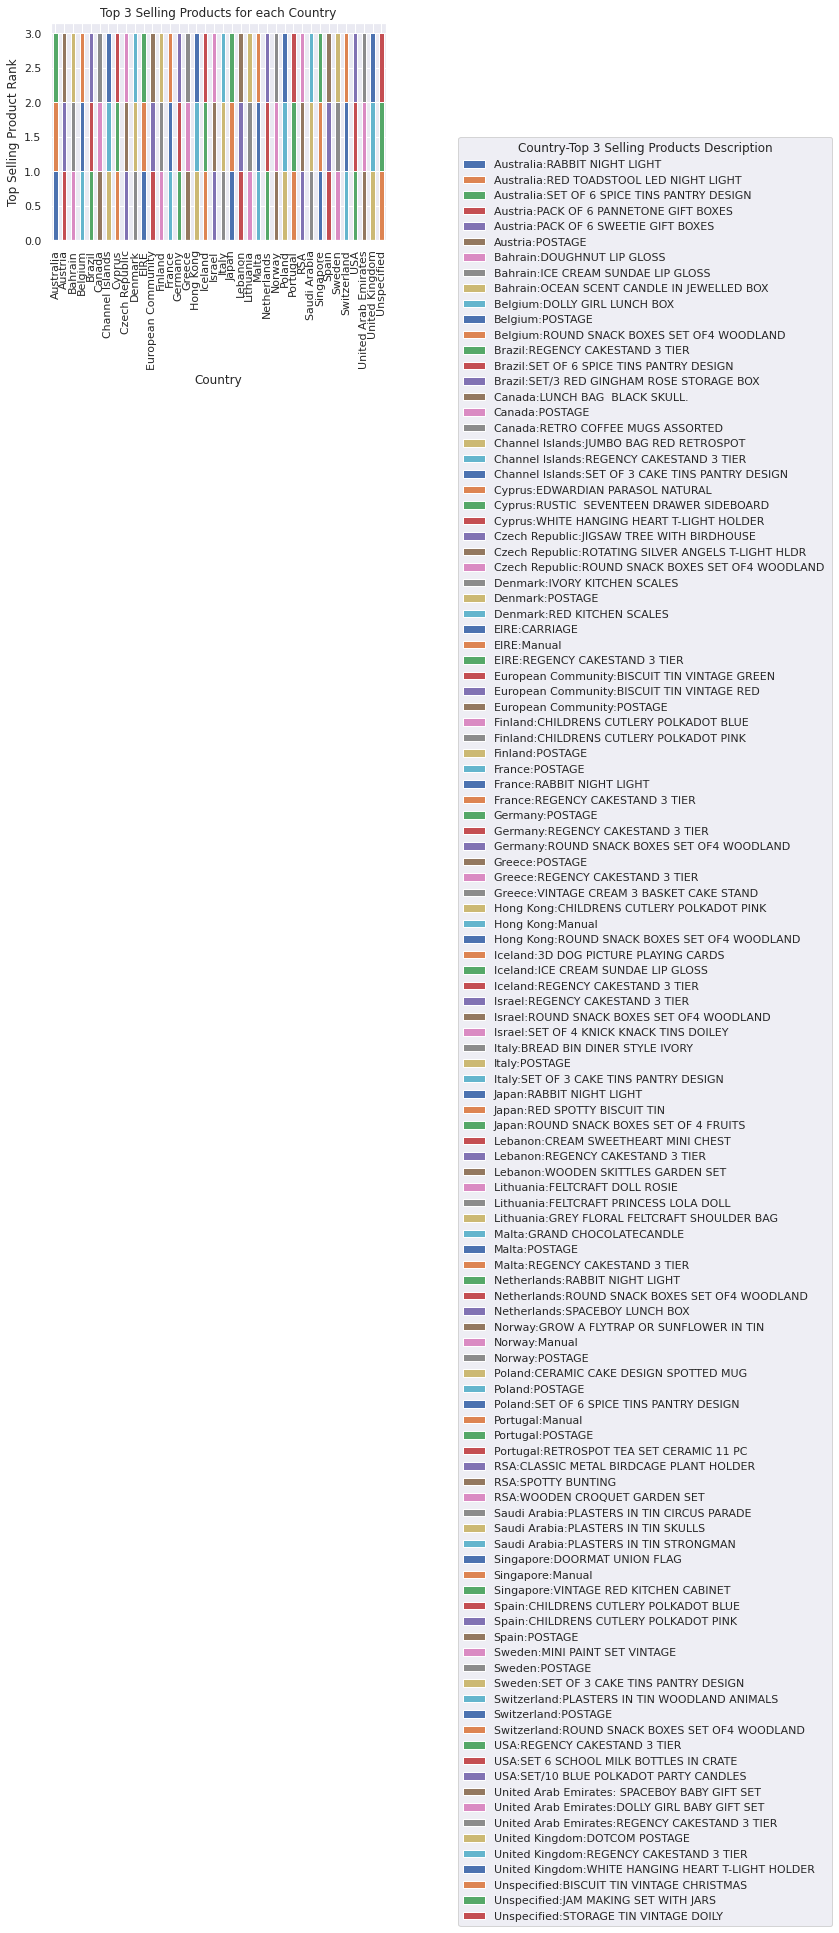

In [109]:
# Count values for each combination of Country and Description
count_df_sales_by_country_3top_product=df_sales_by_country_3top_product.groupby(['Country', 'Description']).size().reset_index(name='Count')
count_df_sales_by_country_3top_product['Country-Description']=count_df_sales_by_country_3top_product['Country']+':'+count_df_sales_by_country_3top_product['Description']

# Pivot the DataFrame for easier plotting
pivot_df_sales_by_country_3top_product = count_df_sales_by_country_3top_product.pivot(index='Country', columns='Country-Description', values='Count')
pivot_df_sales_by_country_3top_product

# Plotting the graph
pivot_df_sales_by_country_3top_product.plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Top Selling Product Rank')
plt.title('Top 3 Selling Products for each Country')
plt.legend(title='Country-Top 3 Selling Products Description',bbox_to_anchor=(1.2, 0.5))
plt.show()

- Top selling products based on the quantity sold across all countries

In [110]:
df_by_q_top_product = df_cleaned[['Description','Quantity']].groupby(['Description']).sum()
df_by_q_top_product.rename(columns={'Quantity': 'TotalQuantity'}, inplace=True)
df_by_q_top_product.sort_values(by=['TotalQuantity'], ascending=False, inplace=True)
df_by_q_top_product.reset_index(inplace=True)

pd.set_option('max_row', None)
df_by_q_top_product

Description  TotalQuantity
0       WORLD WAR 2 GLIDERS ASSTD DESIGNS          54951
1                 JUMBO BAG RED RETROSPOT          48371
2      WHITE HANGING HEART T-LIGHT HOLDER          37872
3                          POPCORN HOLDER          36749
4         PACK OF 72 RETROSPOT CAKE CASES          36396
5           ASSORTED COLOUR BIRD ORNAMENT          36362
6                      RABBIT NIGHT LIGHT          30739
7                 MINI PAINT SET VINTAGE           26633
8              PACK OF 12 LONDON TISSUES           26119
9      PACK OF 60 PINK PAISLEY CAKE CASES          24820
10        VICTORIAN GLASS HANGING T-LIGHT          24275
11              ASSORTED COLOURS SILK FAN          23826
12                    BROCADE RING PURSE           23020
13                 RED  HARMONICA IN BOX           21903
14                JUMBO BAG PINK POLKADOT          21448
15                   SMALL POPCORN HOLDER          20149
16        PAPER CHAIN KIT 50'S CHRISTMAS           19329
17                LUNCH BAG RED RETROSPOT          19232
18                          PARTY BUNTING          18283
19            60 TEATIME FAIRY CAKE CASES          18189
20              CHARLOTTE BAG SUKI DESIGN          18124
21                  HEART OF WICKER SMALL          17963
22            RED RETROSPOT CHARLOTTE BAG          17761
23                   JUMBO BAG STRAWBERRY          17283
24    COLOUR GLASS T-LIGHT HOLDER HANGING          16401
25                 JAM MAKING SET PRINTED          16396
26     GROW A FLYTRAP OR SUNFLOWER IN TIN          16244
27        60 CAKE CASES VINTAGE CHRISTMAS          16032
28            PACK OF 72 SKULL CAKE CASES          15169
29              PLACE SETTING WHITE HEART          15126
30                       JUMBO BAG APPLES          14908
31           ANTIQUE SILVER T-LIGHT GLASS          14664
32                     VINTAGE SNAP CARDS          14521
33                    SPACEBOY LUNCH BOX           14249
34          RED TOADSTOOL LED NIGHT LIGHT          14001
35         JUMBO  BAG BAROQUE BLACK WHITE          13900
36               REGENCY CAKESTAND 3 TIER          13851
37                 JUMBO STORAGE BAG SUKI          13651
38                     JUMBO BAG ALPHABET          13366
39            SMALL CHINESE STYLE SCISSOR          13328
40         72 SWEETHEART FAIRY CAKE CASES          13319
41                 WOODLAND CHARLOTTE BAG          13290
42    SET/20 RED RETROSPOT PAPER NAPKINS           13202
43        DISCO BALL CHRISTMAS DECORATION          12883
44           SET OF 4 PANTRY JELLY MOULDS          12649
45      JUMBO SHOPPER VINTAGE RED PAISLEY          12574
46           HOMEMADE JAM SCENTED CANDLES          12520
47       HANGING HEART JAR T-LIGHT HOLDER          12493
48        GIRLS ALPHABET IRON ON PATCHES           12442
49           TRAVEL CARD WALLET KEEP CALM          12366
50         PACK OF 60 DINOSAUR CAKE CASES          12312
51           PLEASE ONE PERSON METAL SIGN          12274
52                LUNCH BAG  BLACK SKULL.          12195
53                 LUNCH BAG APPLE DESIGN          12147
54                BUBBLEGUM RING ASSORTED          12050
55    SET OF 60 PANTRY DESIGN CAKE CASES           12049
56                    LUNCH BAG CARS BLUE          11786
57                   DOLLY GIRL LUNCH BOX          11780
58            GIN + TONIC DIET METAL SIGN          11709
59               BLACK RECORD COVER FRAME          11651
60                LUNCH BOX I LOVE LONDON          11504
61               JUMBO BAG VINTAGE DOILY           11448
62                         JUMBO BAG OWLS          11429
63         JUMBO BAG PINK VINTAGE PAISLEY          11006
64       PINK BLUE FELT CRAFT TRINKET BOX          10993
65                 JUMBO BAG VINTAGE LEAF          10941
66         HANGING JAM JAR T-LIGHT HOLDER          10792
67    WOODEN HEART CHRISTMAS SCANDINAVIAN          10608
68      PAPER CHAIN KIT VINTAGE CHRISTMAS          10594
69     MULTI COLOUR SILVER T-LIGHT HOLDE

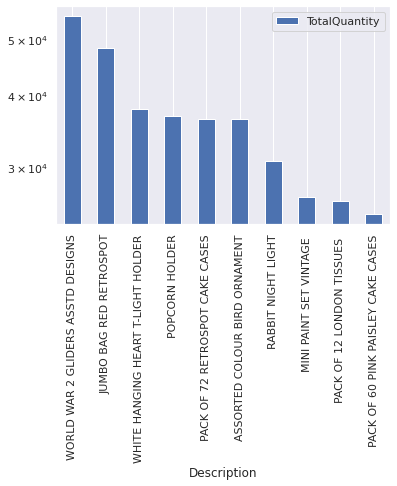

In [111]:
# top 10 products
ax=df_by_q_top_product.head(10).plot(x='Description', y='TotalQuantity', kind='bar') 
ax.set_yscale('log')
plt.show()

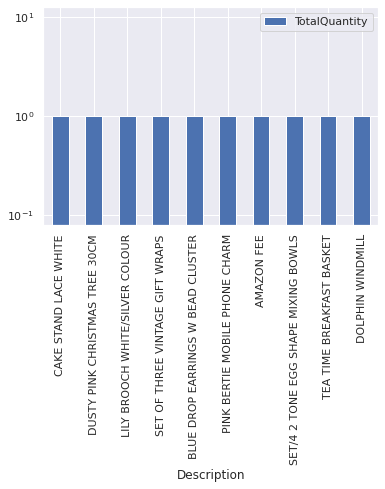

In [112]:
# least 10 products (Amazon Fee??)
ax=df_by_q_top_product.tail(10).plot(x='Description', y='TotalQuantity', kind='bar') 
ax.set_yscale('log')
plt.show()

- Top customers based on the Quantity purchased are from ['United Kingdom', 'EIRE', 'Netherlands', 'Australia']

In [113]:
save_df_cust.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
7 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
8 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
9 2010-12-01 08:34:00       1.69     13047.0  United Kingdom

In [114]:
df_by_custid_q = save_df_cust[['CustomerID','Quantity']].groupby(['CustomerID']).sum()
df_by_custid_q.rename(columns={'Quantity': 'TotalQuantity'}, inplace=True)
df_by_custid_q.sort_values(by=['TotalQuantity'], ascending=False, inplace=True)
df_by_custid_q.reset_index(inplace=True)

#top 10 customers based on quantity purchased
df_by_custid_q.head(10)

CustomerID  TotalQuantity
0     14646.0         197491
1     16446.0          80997
2     14911.0          80490
3     12415.0          77670
4     12346.0          74215
5     17450.0          69973
6     17511.0          64549
7     18102.0          64124
8     13694.0          63312
9     14298.0          58343

In [115]:
top_cust_df = save_df_cust[save_df_cust['CustomerID'].isin(df_by_custid_q.head(10)['CustomerID'])]
top_cust_df['Country'].unique().tolist()

['United Kingdom', 'EIRE', 'Netherlands', 'Australia']

In [116]:
# Products list purchased by top 10 customers
top_cust_df['Description'].unique().tolist()

['CHRISTMAS LIGHTS 10 REINDEER',
 'JAM MAKING SET WITH JARS',
 'JAM MAKING SET PRINTED',
 'JAM JAR WITH PINK LID',
 'JAM JAR WITH GREEN LID',
 'ROSE COTTAGE KEEPSAKE BOX ',
 'HANGING HEART ZINC T-LIGHT HOLDER',
 'PAPER CHAIN KIT VINTAGE CHRISTMAS',
 'DISCO BALL CHRISTMAS DECORATION',
 'WHITE HANGING HEART T-LIGHT HOLDER',
 'SMALL POPCORN HOLDER',
 'LARGE POPCORN HOLDER ',
 'RETROSPOT LARGE MILK JUG',
 'SET/20 RED RETROSPOT PAPER NAPKINS ',
 'SET/6 RED SPOTTY PAPER PLATES',
 'SET/6 RED SPOTTY PAPER CUPS',
 'POLKADOT RAIN HAT ',
 'DELUXE SEWING KIT ',
 'RETROSPOT HEART HOT WATER BOTTLE',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'ENGLISH ROSE HOT WATER BOTTLE',
 'PHOTO CUBE',
 'HOMEMADE JAM SCENTED CANDLES',
 'JUMBO BAG RED RETROSPOT',
 'RED RETROSPOT OVEN GLOVE ',
 'CREAM HEART CARD HOLDER',
 'NAMASTE SWAGAT INCENSE',
 'CERAMIC STRAWBERRY DESIGN MUG',
 'BLACK HEART CARD HOLDER',
 'CLASSICAL ROSE SMALL VASE',
 'BLUE CHARLIE+LOLA PERSONAL DOORSIGN',
 'CHARLIE+LOLA"EXTREMELY BUSY" SIGN',
 '

## Task7: Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.

In [117]:
df_data_info

Count                      Type  PercOfTotalRows
0  536641                 TotalRows       100.000000
1    5268                      Dups         0.981662
2    1454           NullDescription         0.270945
3  135037                NullCustID        25.163377
4    9727  QuantOrUnitPriceNegative         1.812571
5       9          UnitPriceOutlier         0.001677
6       3           QuantityOutlier         0.000559
7     581                    0Sales         0.108266
8     442        UnspecifiedCountry         0.082364

__Outliers__

In [118]:
# 9 UnitPrice Outliers (fee, postages, manual, Adjust bad debt!!), not sure what Manual and Adjust bad debt do mean.
df_cleaned_final[df_cleaned_final['UnitPrice'] > 3000]

Description  Quantity         InvoiceDate  UnitPrice  \
15017        AMAZON FEE         1 2010-12-07 15:08:00   13541.33   
173382          POSTAGE         1 2011-05-03 13:46:00    8142.75   
268028           Manual         1 2011-07-18 12:30:00    4287.63   
297723   DOTCOM POSTAGE         1 2011-08-11 10:14:00    4505.17   
299982  Adjust bad debt         1 2011-08-12 14:50:00   11062.06   
374542           Manual         1 2011-10-03 16:44:00    3155.95   
406406           Manual         1 2011-10-19 11:18:00    3949.32   
422351           Manual         1 2011-10-27 14:13:00    4161.06   
422376           Manual         1 2011-10-27 14:20:00    4161.06   

               Country  
15017   United Kingdom  
173382  United Kingdom  
268028  United Kingdom  
297723  United Kingdom  
299982  United Kingdom  
374542  United Kingdom  
406406       Singapore  
422351          France  
422376          France

In [119]:
# 3 Quantity outlier
# Should not discard MEDIUM CERAMIC TOP STORAGE JAR and PAPER CRAFT , LITTLE BIRDIE outliers in forcasting future sales in United Kingdom.
# These seems the  most sellable items!
df_cleaned_final[df_cleaned_final['Quantity'] > 10000]

Description  Quantity         InvoiceDate  \
61619   MEDIUM CERAMIC TOP STORAGE JAR     74215 2011-01-18 10:01:00   
502122  ASSTD DESIGN 3D PAPER STICKERS     12540 2011-11-25 15:57:00   
540421     PAPER CRAFT , LITTLE BIRDIE     80995 2011-12-09 09:15:00   

        UnitPrice         Country  
61619        1.04  United Kingdom  
502122       0.00  United Kingdom  
540421       2.08  United Kingdom

__Anomalies__

- 5268 duplicate rows in input data can skew the results and compromise the accuracy of the analysis performed on the data. They can impact inefficiencies, increased storage costs, potential inconsistencies in data integrity, incorrect statistics. Duplicate rows indicate data management problems and lack of methods to detect redundant observations.
https://dataladder.com/why-data-duplicates-exist-how-to-get-rid-of-them/
https://www.lexjansen.com/pharmasug/1998/CODERS/CHENG.PDF

__The following clearly impacts data consistency, indicates data management problems and lack of methods to identify missing values for crucial fields:__
- 1454 rows have missing Description
- about 25% of all rows have missing CustID (unique identifier of the customer)
- 9727 rows where ether Quantity or UnitPrice are negative
- 581 rows with zero Sales (Quantity * UnitPrice) because of 0 UnitPrice
- 442 rows do not have Country where the transaction occurred.

In [120]:
df_cleaned_final_UnitPrice_Quantity_out_0_sales[df_cleaned_final_UnitPrice_Quantity_out_0_sales['UnitPrice'] == 0].shape

(581, 6)

In [121]:
df_cleaned_final_UnitPrice_Quantity_out_0_sales.head(10)

Description  Quantity         InvoiceDate  \
6391                             amazon        20 2010-12-03 12:08:00   
6392                             amazon        15 2010-12-03 12:08:00   
9302       ROUND CAKE TIN VINTAGE GREEN         1 2010-12-05 14:02:00   
14335      CREAM SWEETHEART LETTER RACK         1 2010-12-07 11:48:00   
14336  ZINC WILLIE WINKIE  CANDLE STICK         1 2010-12-07 11:48:00   
14337       BOX OF 24 COCKTAIL PARASOLS         2 2010-12-07 11:48:00   
14338             DOORMAT ENGLISH ROSE          3 2010-12-07 11:48:00   
14339             DOORMAT 3 SMILEY CATS         1 2010-12-07 11:48:00   
14340   GREEN REGENCY TEACUP AND SAUCER         1 2010-12-07 11:48:00   
14341     FRENCH BLUE METAL DOOR SIGN 7         1 2010-12-07 11:48:00   

       UnitPrice         Country  Sales  
6391         0.0  United Kingdom    0.0  
6392         0.0  United Kingdom    0.0  
9302         0.0         Germany    0.0  
14335        0.0  United Kingdom    0.0  
14336        0.0  United Kingdom    0.0  
14337        0.0  United Kingdom    0.0  
14338        0.0  United Kingdom    0.0  
14339        0.0  United Kingdom    0.0  
14340        0.0  United Kingdom    0.0  
14341        0.0  United Kingdom    0.0

## Task8: Draw conclusions and summarize your findings from the exploratory data analysis.

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction  <a name="introduction"></a>

## 1.1. Background

In this project, we worked with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

# 1.2. Problem

Explore and analyze the dataset to gain insights into the store's sales trends, customer behavior, and popular products, helping interpret real-world data to help make a key business decision.

# 1.3 Interest

This report is targeted to anyone interested in the online retail store data analysis.

# Data  <a name="data"></a>

The dataset contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named Online Retail.xlsx.

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

# Methodology  <a name="methodology"></a>

We conducted exploratory data analysis such as boxplots, bar graphs to identify patterns, outliers, and correlations in the data.This allowed us to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. 

We performed Data Cleaning to prepare data for analysis. It is a process of preparing data to meet the quality criteria such as validity, uniformity, accuracy, consistency, and completeness. Data cleansing removes unwanted, duplicate, and incorrect data from datasets, thus helping the analyst to develop accurate insight: https://www.dataversity.net/data-cleansing-why-its-important/.

Through visualizations and statistical analysis, we uncovered key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers.

# Analysis  <a name="analysis"></a>

# 4.1 Basic Explanatory Analysis

In [122]:
df_data_info

Count                      Type  PercOfTotalRows
0  536641                 TotalRows       100.000000
1    5268                      Dups         0.981662
2    1454           NullDescription         0.270945
3  135037                NullCustID        25.163377
4    9727  QuantOrUnitPriceNegative         1.812571
5       9          UnitPriceOutlier         0.001677
6       3           QuantityOutlier         0.000559
7     581                    0Sales         0.108266
8     442        UnspecifiedCountry         0.082364

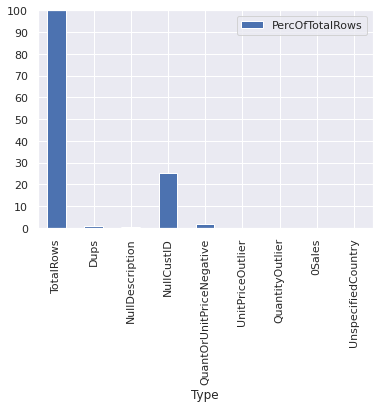

In [123]:
ax=df_data_info.plot(x='Type', y='PercOfTotalRows', kind='bar') 
#ax.set_yscale('log')
ax.set_ylim(0, 100)  # Set the y-axis limits
ax.set_yticks(range(0, 101, 10))
plt.show()

__Outliers__

In [124]:
# 9 UnitPrice Outliers (fee, postages, manual, Adjust bad debt!!), not sure what Manual and Adjust bad debt do mean.
df_cleaned_final[df_cleaned_final['UnitPrice'] > 3000]

Description  Quantity         InvoiceDate  UnitPrice  \
15017        AMAZON FEE         1 2010-12-07 15:08:00   13541.33   
173382          POSTAGE         1 2011-05-03 13:46:00    8142.75   
268028           Manual         1 2011-07-18 12:30:00    4287.63   
297723   DOTCOM POSTAGE         1 2011-08-11 10:14:00    4505.17   
299982  Adjust bad debt         1 2011-08-12 14:50:00   11062.06   
374542           Manual         1 2011-10-03 16:44:00    3155.95   
406406           Manual         1 2011-10-19 11:18:00    3949.32   
422351           Manual         1 2011-10-27 14:13:00    4161.06   
422376           Manual         1 2011-10-27 14:20:00    4161.06   

               Country  
15017   United Kingdom  
173382  United Kingdom  
268028  United Kingdom  
297723  United Kingdom  
299982  United Kingdom  
374542  United Kingdom  
406406       Singapore  
422351          France  
422376          France

In [125]:
# 3 Quantity outlier
# Should not discard MEDIUM CERAMIC TOP STORAGE JAR and PAPER CRAFT , LITTLE BIRDIE outliers in forcasting future sales in United Kingdom.
# These seems the  most sellable items!
df_cleaned_final[df_cleaned_final['Quantity'] > 10000]

Description  Quantity         InvoiceDate  \
61619   MEDIUM CERAMIC TOP STORAGE JAR     74215 2011-01-18 10:01:00   
502122  ASSTD DESIGN 3D PAPER STICKERS     12540 2011-11-25 15:57:00   
540421     PAPER CRAFT , LITTLE BIRDIE     80995 2011-12-09 09:15:00   

        UnitPrice         Country  
61619        1.04  United Kingdom  
502122       0.00  United Kingdom  
540421       2.08  United Kingdom

__Anomalies__

- 5268 duplicate rows in input data can skew the results and compromise the accuracy of the analysis performed on the data. They can impact inefficiencies, increased storage costs, potential inconsistencies in data integrity, incorrect statistics. Duplicate rows indicate data management problems and lack of methods to detect redundant observations.
https://dataladder.com/why-data-duplicates-exist-how-to-get-rid-of-them/
https://www.lexjansen.com/pharmasug/1998/CODERS/CHENG.PDF

__The following clearly impacts data consistency, indicates data management problems and lack of methods to identify missing values for crucial fields:__
- 1454 rows have missing Description
- about 25% of all rows have missing CustID (unique identifier of the customer)
- 9727 rows where ether Quantity or UnitPrice are negative
- 581 rows with zero Sales (Quantity * UnitPrice) because of 0 UnitPrice
- 442 rows do not have Country where the transaction occurred.

__The basic statistics of the cleaned dataset__

In [126]:
df_cleaned[['Quantity','UnitPrice','Sales']].describe()

Quantity      UnitPrice          Sales
count  524867.000000  524867.000000  524867.000000
mean       10.321093       3.814114      19.699260
std        37.914470      20.158813      86.717175
min         1.000000       0.001000       0.001000
25%         1.000000       1.250000       3.900000
50%         4.000000       2.080000       9.920000
75%        11.000000       4.130000      17.700000
max      4800.000000    2653.950000   38970.000000

## Results and Discussion  <a name="results"></a>

# Results

- The most frequent products are WHITE HANGING HEART T-LIGHT HOLDER and JUMBO BAG RED RETROSPOT

Text(0.5, 0, 'Description')

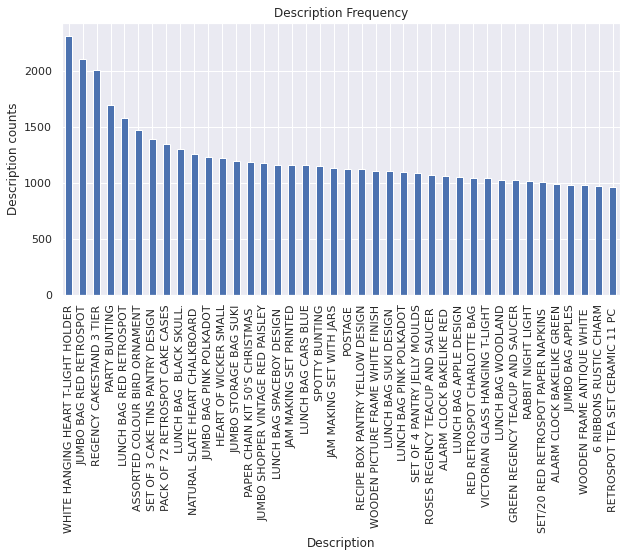

In [128]:
df_cleaned_final.Description.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Description Frequency")
plt.ylabel('Description counts')
plt.xlabel('Description')

- The most frequent quantity sizes are 1 and 2

Text(0.5, 0, 'Quantity')

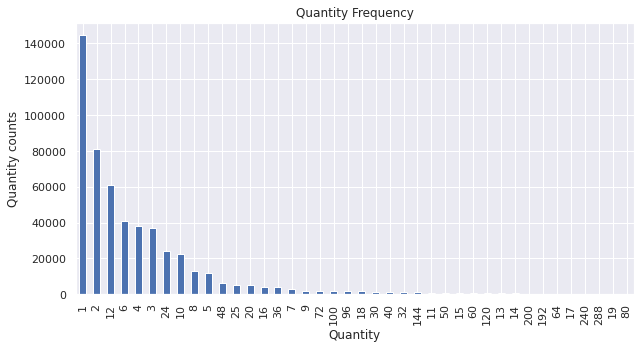

In [129]:
df_cleaned_final.Quantity.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Quantity Frequency")
plt.ylabel('Quantity counts')
plt.xlabel('Quantity')

- Top 20 sales where Sales = Quantity * UnitPrice

DOTCOM POSTAGE is the top sale.

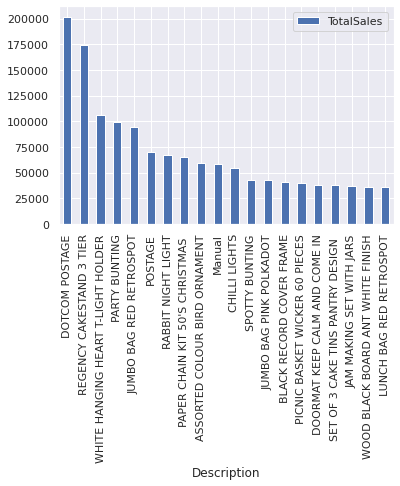

In [130]:
df_sales.head(20).plot(x='Description', y='TotalSales', kind='bar') 
plt.show()

- Least 20 sales where Sales = Quantity * UnitPrice

PADS TO MATCH ALL CUSHIONS has the smallest sales

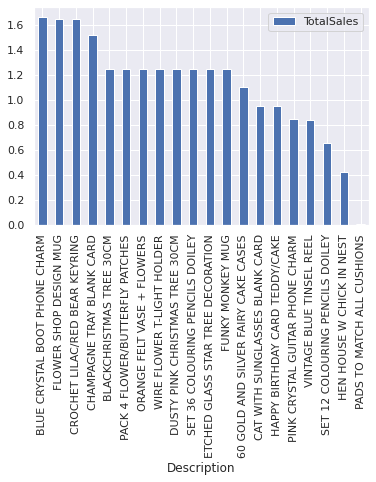

In [131]:
df_sales[df_sales['TotalSales'] > 0].tail(20).plot(x='Description', y='TotalSales', kind='bar') 
plt.show()

- moderate positive correlation of 0.495794 between Quantity and Sales is expected (more quantity sold larger sales)
- weak positive correlation of 0.259481 between UnitPrice and Sales indicates larger UnitPrice would generate larger Sales
- very weak negative correlation of -0.025731, almost no correlation, between Quantity and UnitPrice.

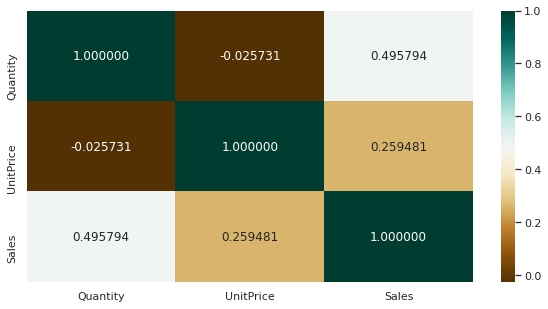

In [132]:
plt.figure(figsize=(10,5))
c= df_cleaned.corr()
sns.heatmap(c,cmap="BrBG",annot=True, fmt=".6f")

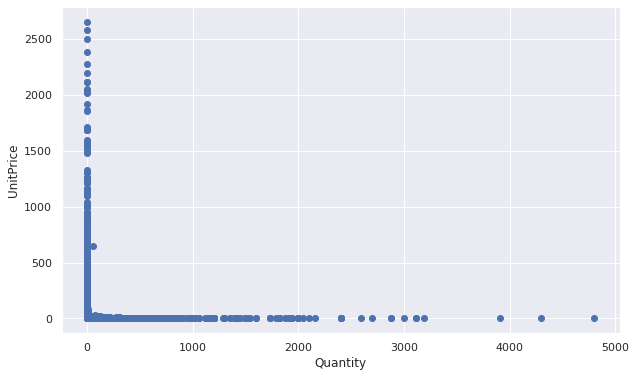

In [133]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_cleaned['Quantity'], df_cleaned['UnitPrice'])
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
plt.show()

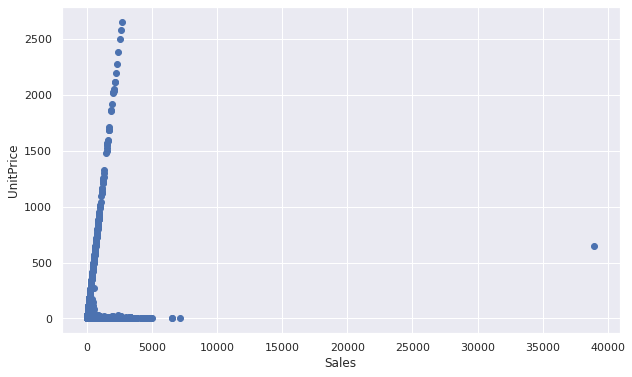

In [134]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_cleaned['Sales'], df_cleaned['UnitPrice'])
ax.set_xlabel('Sales')
ax.set_ylabel('UnitPrice')
plt.show()

In [137]:
# the above Sales outlier is for PICNIC BASKET WICKER 60 PIECES product
df_cleaned[df_cleaned['Sales'] > 35000]

Description  Quantity         InvoiceDate  \
222680  PICNIC BASKET WICKER 60 PIECES        60 2011-06-10 15:28:00   

        UnitPrice         Country    Sales year_quarter day_of_week year_month  
222680      649.5  United Kingdom  38970.0       2011Q2      Friday    2011-06

- About 84% Total Sales in United Kingdom, 16% in all other countries
- The smallest Total Sales in Saudi Arabia

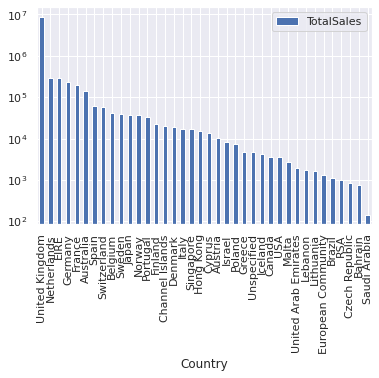

In [138]:
ax=df_sales_by_country.plot(x='Country', y='TotalSales', kind='bar') 
ax.set_yscale('log')
plt.show()

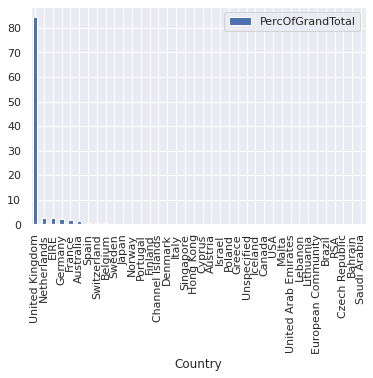

In [171]:
ax=df_sales_by_country.plot(x='Country', y='PercOfGrandTotal', kind='bar') 
plt.show()

- Notice above Unspecified country!

In [140]:
df_country_unspec = df_cleaned[df_cleaned['Country'] == 'Unspecified']
print('Shape of Unspecified country: ',df_country_unspec.shape)
df_country_unspec.head(10)

Shape of Unspecified country:  (442, 9)


Description  Quantity         InvoiceDate  \
152712               DOORMAT RED RETROSPOT         2 2011-04-11 13:29:00   
152713             DOORMAT WELCOME SUNRISE         2 2011-04-11 13:29:00   
152714          DOORMAT MULTICOLOUR STRIPE         2 2011-04-11 13:29:00   
152715         PACK OF 72 SKULL CAKE CASES        24 2011-04-11 13:29:00   
152716  PACK OF 60 PINK PAISLEY CAKE CASES        24 2011-04-11 13:29:00   
152717      PACK OF 60 MUSHROOM CAKE CASES        24 2011-04-11 13:29:00   
152718     PACK OF 72 RETROSPOT CAKE CASES        24 2011-04-11 13:29:00   
152719      72 SWEETHEART FAIRY CAKE CASES        24 2011-04-11 13:29:00   
152720         60 TEATIME FAIRY CAKE CASES        24 2011-04-11 13:29:00   
152721    SET OF 36 PAISLEY FLOWER DOILIES        12 2011-04-11 13:29:00   

        UnitPrice      Country  Sales year_quarter day_of_week year_month  
152712       7.95  Unspecified   15.9       2011Q2      Monday    2011-04  
152713       7.95  Unspecified   15.9       2011Q2      Monday    2011-04  
152714       7.95  Unspecified   15.9       2011Q2      Monday    2011-04  
152715       0.55  Unspecified   13.2       2011Q2      Monday    2011-04  
152716       0.55  Unspecified   13.2       2011Q2      Monday    2011-04  
152717       0.55  Unspecified   13.2       2011Q2      Monday    2011-04  
152718       0.55  Unspecified   13.2       2011Q2      Monday    2011-04  
152719       0.55  Unspecified   13.2       2011Q2      Monday    2011-04  
152720       0.55  Unspecified   13.2       2011Q2      Monday    2011-04  
152721       1.45  Unspecified   17.4       2011Q2      Monday    2011-04

- Top 3 selling products based on Sales for each country

In [146]:
df_sales_by_country_top_product = df_cleaned[['Country','Description','Sales']].groupby(['Country','Description']).sum()
df_sales_by_country_top_product.rename(columns={'Sales': 'TotalProductSales'}, inplace=True)
df_sales_by_country_top_product.sort_values(by=['Country','TotalProductSales'], ascending=[True, False], inplace=True)
df_sales_by_country_top_product.reset_index(inplace=True)
df_sales_by_country_top_product['Rank']=df_sales_by_country_top_product.groupby('Country').cumcount() + 1

# For each country, limit to top 3 purchased products
df_sales_by_country_3top_product = df_sales_by_country_top_product[df_sales_by_country_top_product['Rank'] <=3]
df_sales_by_country_3top_product.reset_index(inplace=True)
print('Shape of df_sales_by_country_3top_product: ',df_sales_by_country_3top_product.shape)

pd.set_option('max_row', None)
df_sales_by_country_3top_product

Shape of df_sales_by_country_3top_product:  (114, 5)


index               Country                          Description  \
0        0             Australia                   RABBIT NIGHT LIGHT   
1        1             Australia    SET OF 6 SPICE TINS PANTRY DESIGN   
2        2             Australia        RED TOADSTOOL LED NIGHT LIGHT   
3      608               Austria                              POSTAGE   
4      609               Austria       PACK OF 6 PANNETONE GIFT BOXES   
5      610               Austria         PACK OF 6 SWEETIE GIFT BOXES   
6      914               Bahrain   OCEAN SCENT CANDLE IN JEWELLED BOX   
7      915               Bahrain           ICE CREAM SUNDAE LIP GLOSS   
8      916               Bahrain                  DOUGHNUT LIP GLOSS    
9      930               Belgium                              POSTAGE   
10     931               Belgium  ROUND SNACK BOXES SET OF4 WOODLAND    
11     932               Belgium                 DOLLY GIRL LUNCH BOX   
12    1714                Brazil             REGENCY CAKESTAND 3 TIER   
13    1715                Brazil    SET OF 6 SPICE TINS PANTRY DESIGN   
14    1716                Brazil   SET/3 RED GINGHAM ROSE STORAGE BOX   
15    1746                Canada                              POSTAGE   
16    1747                Canada           RETRO COFFEE MUGS ASSORTED   
17    1748                Canada              LUNCH BAG  BLACK SKULL.   
18    1893       Channel Islands             REGENCY CAKESTAND 3 TIER   
19    1894       Channel Islands              JUMBO BAG RED RETROSPOT   
20    1895       Channel Islands    SET OF 3 CAKE TINS PANTRY DESIGN    
21    2329                Cyprus   RUSTIC  SEVENTEEN DRAWER SIDEBOARD   
22    2330                Cyprus            EDWARDIAN PARASOL NATURAL   
23    2331                Cyprus   WHITE HANGING HEART T-LIGHT HOLDER   
24    2827        Czech Republic  ROUND SNACK BOXES SET OF4 WOODLAND    
25    2828        Czech Republic  ROTATING SILVER ANGELS T-LIGHT HLDR   
26    2829        Czech Republic           JIGSAW TREE WITH BIRDHOUSE   
27    2852               Denmark                              POSTAGE   
28    2853               Denmark                   RED KITCHEN SCALES   
29    2854               Denmark                 IVORY KITCHEN SCALES   
30    3104                  EIRE             REGENCY CAKESTAND 3 TIER   
31    3105                  EIRE                               Manual   
32    3106                  EIRE                             CARRIAGE   
33    5121    European Community                              POSTAGE   
34    5122    European Community            BISCUIT TIN VINTAGE GREEN   
35    5123    European Community              BISCUIT TIN VINTAGE RED   
36    5171               Finland                              POSTAGE   
37    5172               Finland      CHILDRENS CUTLERY POLKADOT PINK   
38    5173               Finland      CHILDRENS CUTLERY POLKADOT BLUE   
39    5636                France                              POSTAGE   
40    5637                France                   RABBIT NIGHT LIGHT   
41    5638                France             REGENCY CAKESTAND 3 TIER   
42    7200               Germany                              POSTAGE   
43    7201               Germany             REGENCY CAKESTAND 3 TIER   
44    7202               Germany  ROUND SNACK BOXES SET OF4 WOODLAND    
45    8896                Greece                              POSTAGE   
46    8897                Greece             REGENCY CAKESTAND 3 TIER   
47    8898                Greece    VINTAGE CREAM 3 BASKET CAKE STAND   
48    9034             Hong Kong                               Manual   
49    9035             Hong Kong      CHILDRENS CUTLERY POLKADOT PINK   
50    9036             Hong Kong  ROUND SNACK BOXES SET OF4 WOODLAND    
51    9228               Iceland         3D DOG PICTURE PLAYING CARDS   
52    9229               Iceland           ICE CREAM SUNDAE LIP GLOSS   
53    9230               Iceland             REGENCY CAKESTAND 

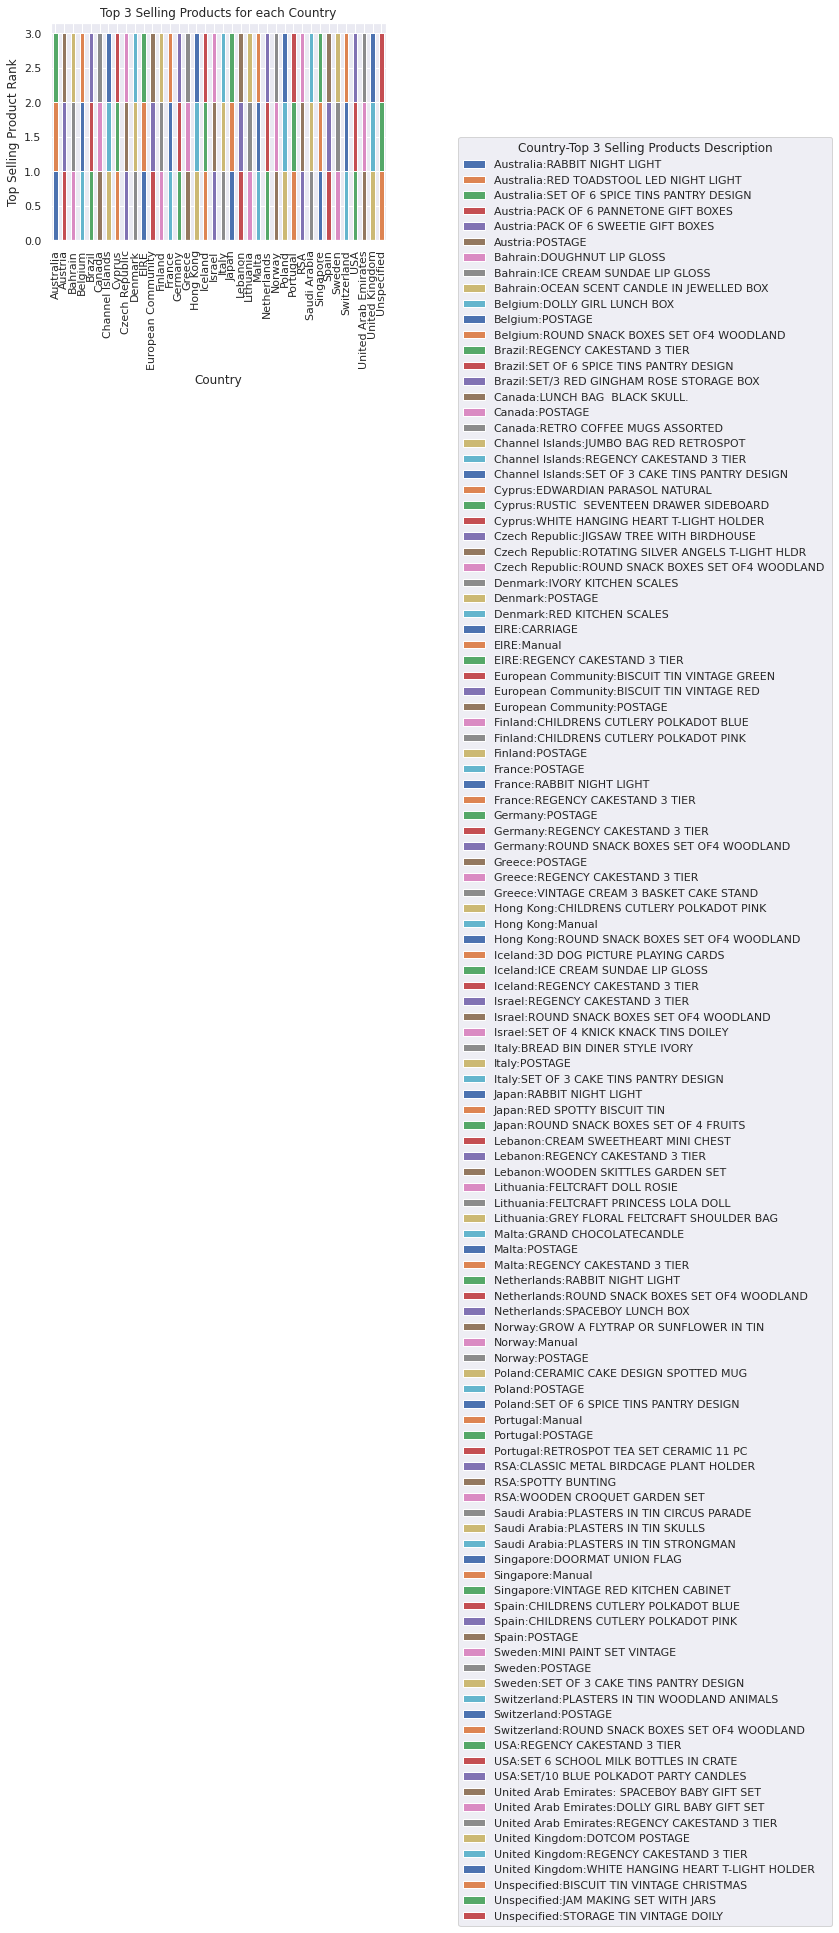

In [143]:
# Count values for each combination of Country and Description
count_df_sales_by_country_3top_product=df_sales_by_country_3top_product.groupby(['Country', 'Description']).size().reset_index(name='Count')
count_df_sales_by_country_3top_product['Country-Description']=count_df_sales_by_country_3top_product['Country']+':'+count_df_sales_by_country_3top_product['Description']

# Pivot the DataFrame for easier plotting
pivot_df_sales_by_country_3top_product = count_df_sales_by_country_3top_product.pivot(index='Country', columns='Country-Description', values='Count')
pivot_df_sales_by_country_3top_product

# Plotting the graph
pivot_df_sales_by_country_3top_product.plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Top Selling Product Rank')
plt.title('Top 3 Selling Products for each Country')
plt.legend(title='Country-Top 3 Selling Products Description',bbox_to_anchor=(1.2, 0.5))
plt.show()

- Top 3 selling products based on quantity for each Country

In [144]:
df_q_by_country_top_product = df_cleaned[['Country','Description','Quantity']].groupby(['Country','Description']).sum()
df_q_by_country_top_product.rename(columns={'Quantity': 'TotalQuantity'}, inplace=True)
df_q_by_country_top_product.sort_values(by=['Country','TotalQuantity'], ascending=[True, False], inplace=True)
df_q_by_country_top_product.reset_index(inplace=True)
df_q_by_country_top_product['Rank']=df_q_by_country_top_product.groupby('Country').cumcount() + 1

# For each country, limit to top 3 purchased products
df_q_by_country_3top_product = df_q_by_country_top_product[df_q_by_country_top_product['Rank'] <=3]
df_q_by_country_3top_product.reset_index(inplace=True)
print('Shape of df_q_by_country_3top_product: ',df_q_by_country_3top_product.shape)

pd.set_option('max_row', None)
df_q_by_country_3top_product

Shape of df_q_by_country_3top_product:  (114, 5)


index               Country                          Description  \
0        0             Australia              MINI PAINT SET VINTAGE    
1        1             Australia                   RABBIT NIGHT LIGHT   
2        2             Australia               RED  HARMONICA IN BOX    
3      608               Austria     SET 12 KIDS COLOUR  CHALK STICKS   
4      609               Austria                   MINI JIGSAW PURDEY   
5      610               Austria       PACK OF 6 PANNETONE GIFT BOXES   
6      914               Bahrain           ICE CREAM SUNDAE LIP GLOSS   
7      915               Bahrain                  DOUGHNUT LIP GLOSS    
8      916               Bahrain   OCEAN SCENT CANDLE IN JEWELLED BOX   
9      930               Belgium      PACK OF 72 RETROSPOT CAKE CASES   
10     931               Belgium  ROUND SNACK BOXES SET OF4 WOODLAND    
11     932               Belgium       PACK OF 60 SPACEBOY CAKE CASES   
12    1714                Brazil                 DOLLY GIRL LUNCH BOX   
13    1715                Brazil      GREEN REGENCY TEACUP AND SAUCER   
14    1716                Brazil       PINK REGENCY TEACUP AND SAUCER   
15    1746                Canada           RETRO COFFEE MUGS ASSORTED   
16    1747                Canada    WORLD WAR 2 GLIDERS ASSTD DESIGNS   
17    1748                Canada         COLOURING PENCILS BROWN TUBE   
18    1893       Channel Islands                         RAIN PONCHO    
19    1894       Channel Islands              JUMBO BAG RED RETROSPOT   
20    1895       Channel Islands       JUMBO  BAG BAROQUE BLACK WHITE   
21    2329                Cyprus       HEART DECORATION PAINTED ZINC    
22    2330                Cyprus        BOYS ALPHABET IRON ON PATCHES   
23    2331                Cyprus      GIRLS ALPHABET IRON ON PATCHES    
24    2827        Czech Republic   WOODEN STAR CHRISTMAS SCANDINAVIAN   
25    2828        Czech Republic   WOODEN TREE CHRISTMAS SCANDINAVIAN   
26    2829        Czech Republic  CHRISTMAS TABLE SILVER CANDLE SPIKE   
27    2852               Denmark               RED  HARMONICA IN BOX    
28    2853               Denmark       SET OF 6 TEA TIME BAKING CASES   
29    2854               Denmark                    GUMBALL COAT RACK   
30    3104                  EIRE      PACK OF 72 RETROSPOT CAKE CASES   
31    3105                  EIRE          60 TEATIME FAIRY CAKE CASES   
32    3106                  EIRE                   VINTAGE SNAP CARDS   
33    5121    European Community       RED ROCKING HORSE HAND PAINTED   
34    5122    European Community       ROCKING HORSE GREEN CHRISTMAS    
35    5123    European Community         ROCKING HORSE RED CHRISTMAS    
36    5171               Finland      CHILDRENS CUTLERY POLKADOT PINK   
37    5172               Finland      CHILDRENS CUTLERY POLKADOT BLUE   
38    5173               Finland                  DOUGHNUT LIP GLOSS    
39    5636                France                   RABBIT NIGHT LIGHT   
40    5637                France              MINI PAINT SET VINTAGE    
41    5638                France        RED TOADSTOOL LED NIGHT LIGHT   
42    7200               Germany  ROUND SNACK BOXES SET OF4 WOODLAND    
43    7201               Germany            ASSORTED COLOURS SILK FAN   
44    7202               Germany                              POSTAGE   
45    8896                Greece  4 LAVENDER BOTANICAL DINNER CANDLES   
46    8897                Greece      4 PEAR BOTANICAL DINNER CANDLES   
47    8898                Greece       SET OF 4 NAPKIN CHARMS CUTLERY   
48    9034             Hong Kong  ROUND SNACK BOXES SET OF4 WOODLAND    
49    9035             Hong Kong    WORLD WAR 2 GLIDERS ASSTD DESIGNS   
50    9036             Hong Kong                   BLUE POLKADOT BOWL   
51    9228               Iceland           ICE CREAM SUNDAE LIP GLOSS   
52    9229               Iceland         3D DOG PICTURE PLAYING CARDS   
53    9230               Iceland              MINI PAINT SET VI

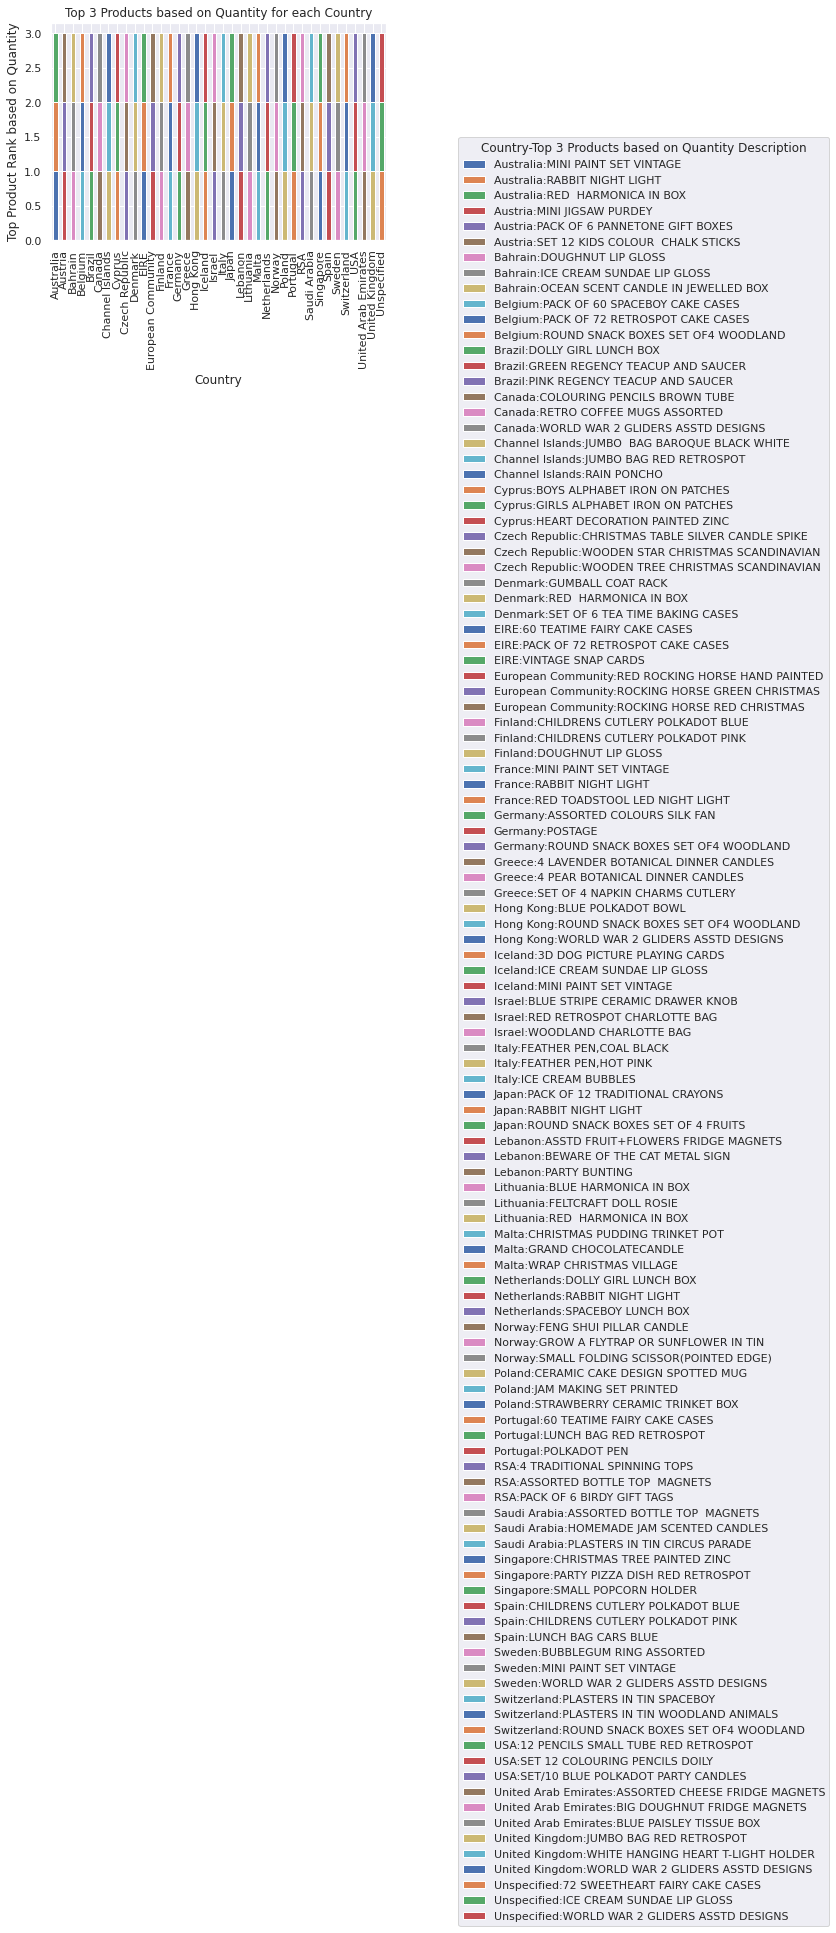

In [145]:
# Count values for each combination of Country and Description
count_df_q_by_country_3top_product=df_q_by_country_3top_product.groupby(['Country', 'Description']).size().reset_index(name='Count')
count_df_q_by_country_3top_product['Country-Description']=count_df_q_by_country_3top_product['Country']+':'+count_df_q_by_country_3top_product['Description']

# Pivot the DataFrame for easier plotting
pivot_df_q_by_country_3top_product = count_df_q_by_country_3top_product.pivot(index='Country', columns='Country-Description', values='Count')
pivot_df_q_by_country_3top_product

# Plotting the graph
pivot_df_q_by_country_3top_product.plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Top Product Rank based on Quantity')
plt.title('Top 3 Products based on Quantity for each Country')
plt.legend(title='Country-Top 3 Products based on Quantity Description',bbox_to_anchor=(1.2, 0.5))
plt.show()

- Total Quantity sold in each Country

In [152]:
df_q_by_country = df_cleaned[['Country','Quantity']].groupby('Country').sum()
df_q_by_country.rename(columns={'Quantity': 'TotalQuantity'}, inplace=True)
df_q_by_country.sort_values(by='TotalQuantity', ascending=False, inplace=True)
df_q_by_country.reset_index(inplace=True)
df_q_by_country.head(40)

Country  TotalQuantity
0         United Kingdom        4491690
1            Netherlands         200361
2                   EIRE         147007
3                Germany         119154
4                 France         112058
5              Australia          83891
6                 Sweden          36078
7            Switzerland          30617
8                  Spain          27933
9                  Japan          26016
10               Belgium          23237
11                Norway          19336
12              Portugal          16231
13               Finland          10704
14       Channel Islands           9485
15               Denmark           8235
16                 Italy           8112
17                Cyprus           6340
18             Singapore           5240
19               Austria           4881
20             Hong Kong           4713
21                Israel           4406
22                Poland           3684
23           Unspecified           3295
24                Canada           2763
25                   USA           2458
26               Iceland           2458
27                Greece           1557
28  United Arab Emirates            982
29                 Malta            970
30        Czech Republic            671
31             Lithuania            652
32    European Community            499
33               Lebanon            386
34                Brazil            356
35                   RSA            351
36               Bahrain            314
37          Saudi Arabia             80

- about 83% Total Quantity sold in United Kingdom, 17% in all other countries and this agrees with 84% and 16% based on Sales

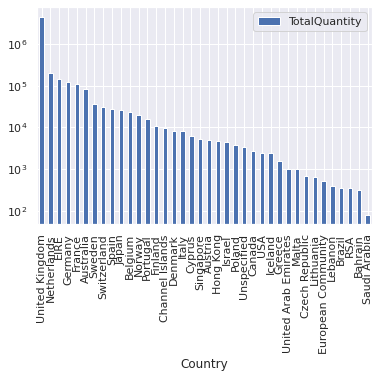

In [149]:
# The largest Total Quantity sold in United Kingdom
# The smallest Total Quantity sold in Saudi Arabia
ax=df_q_by_country.plot(x='Country', y='TotalQuantity', kind='bar') 
ax.set_yscale('log')
plt.show()

In [150]:
df_q_by_country['GrandTotal'] = df_q_by_country['TotalQuantity'].sum()
df_q_by_country['PercOfGrandTotal']=100*df_q_by_country['TotalQuantity']/df_q_by_country['GrandTotal']
df_q_by_country.head(10)

Country  TotalQuantity  GrandTotal  PercOfGrandTotal
0  United Kingdom        4491690     5417201         82.915328
1     Netherlands         200361     5417201          3.698607
2            EIRE         147007     5417201          2.713708
3         Germany         119154     5417201          2.199549
4          France         112058     5417201          2.068559
5       Australia          83891     5417201          1.548604
6          Sweden          36078     5417201          0.665990
7     Switzerland          30617     5417201          0.565181
8           Spain          27933     5417201          0.515635
9           Japan          26016     5417201          0.480248

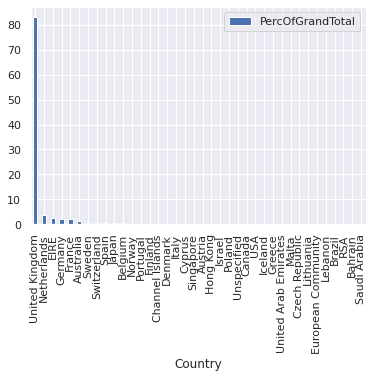

In [151]:
ax=df_q_by_country.plot(x='Country', y='PercOfGrandTotal', kind='bar') 
plt.show()

- Total Sales by Country and Quarter

In [153]:
df_sales_by_country_q_pivot = df_sales_by_country_q.pivot(index='Country', columns='year_quarter', values='TotalQuarterSales')
df_sales_by_country_q_pivot['TotalSales']=df_sales_by_country_q_pivot['2010Q4'].fillna(0)+df_sales_by_country_q_pivot['2011Q1'].fillna(0)+df_sales_by_country_q_pivot['2011Q2'].fillna(0)+df_sales_by_country_q_pivot['2011Q3'].fillna(0)+df_sales_by_country_q_pivot['2011Q4'].fillna(0)
df_sales_by_country_q_pivot.sort_values(by='TotalSales', ascending=False, inplace=True)
df_sales_by_country_q_pivot.head(40)

year_quarter             2010Q4      2011Q1       2011Q2       2011Q3  \
Country                                                                 
United Kingdom        732540.89  1496589.63  1723985.301  2082947.783   
Netherlands             8784.48    72039.56    59020.530    67291.090   
EIRE                   10033.26    56305.44    50437.830   104006.750   
Germany                15205.74    40854.58    51296.590    53741.220   
France                  9616.31    40841.03    39484.500    47239.190   
Australia                965.35    40937.12    39597.780    32560.310   
Spain                   1843.73    17563.74     8376.460    16152.420   
Switzerland             1304.92     8756.38    13591.100    17245.510   
Belgium                 1809.91     6733.25     8996.700    10237.610   
Sweden                  3834.30     8716.40     4323.080    12767.660   
Japan                   7705.07     5829.71     9506.990     3966.480   
Norway                  3787.12     1896.21     5886.860    11594.820   
Portugal                2439.97     7930.46     6774.440     4942.470   
Finland                  892.80     7031.00     2018.480     5478.680   
Channel Islands          363.53     5969.62     3560.270     6210.630   
Denmark                 1281.50     4378.21     3776.850     5159.550   
Italy                    811.50     4465.32     1527.350     2417.850   
Singapore                   NaN     2053.07     8209.580     3949.320   
Hong Kong                   NaN     4814.72     4139.760     5467.900   
Cyprus                  1587.07     5820.13     1109.320      196.350   
Austria                  277.20     2226.48     1930.210     2708.030   
Israel                      NaN     1158.94      110.000     6728.290   
Poland                   248.16     1535.05     2571.860     1618.350   
Greece                      NaN     3048.55      609.740      421.240   
Unspecified                 NaN         NaN     1540.750     2234.440   
Iceland                  711.79      475.39     1018.770      584.910   
Canada                      NaN      140.54     1705.700     1820.140   
USA                         NaN         NaN      383.950          NaN   
Malta                       NaN         NaN      863.160     1119.000   
United Arab Emirates        NaN      889.24          NaN     1013.040   
Lebanon                     NaN     1693.88          NaN          NaN   
Lithuania               1661.06         NaN          NaN          NaN   
European Community          NaN         NaN      623.450      676.800   
Brazil                      NaN         NaN     1143.600          NaN   
RSA                         NaN         NaN          NaN          NaN   
Czech Republic              NaN      549.26          NaN          NaN   
Bahrain                  205.74         NaN      548.400          NaN   
Saudi Arabia                NaN      145.92          NaN          NaN   

year_quarter                2011Q4    TotalSales  
Country                                           
United Kingdom        2.675332e+06  8.711396e+06  
Netherlands           7.831068e+04  2.854463e+05  
EIRE                  6.235724e+04  2.831405e+05  
Germany               6.758027e+04  2.286784e+05  
France                6.412222e+04  2.013033e+05  
Australia             2.439325e+04  1.384538e+05  
Spain                 1.762221e+04  6.155856e+04  
Switzerland           1.616969e+04  5.706760e+04  
Belgium               1.341887e+04  4.119634e+04  
Sweden                8.726390e+03  3.836783e+04  
Japan                 1.040812e+04  3.741637e+04  
Norway                1.300043e+04  3.616544e+04  
Portugal              1.159571e+04  3.368305e+04  
Finland               7.125120e+03  2.254608e+04  
Channel Islands       4.336490e+03  2.044054e+04  
Denmark               4.359230e+03  1.895534e+04  
Italy                 8.261220e+03  1.748324e+04  
Singapore             3.118000e+03  1.732997e+04  
Hong Kong             1.060620e+03  1.548300e+04  
Cyprus  

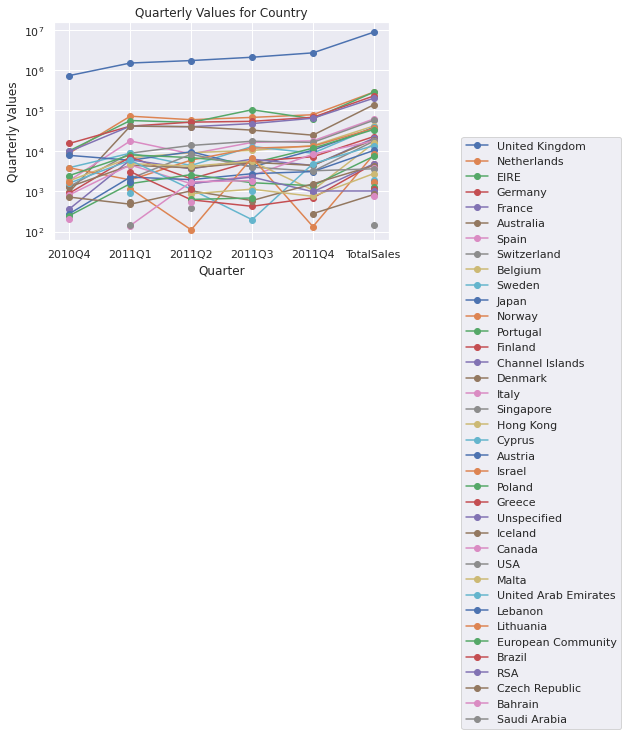

In [154]:
# Plotting each row
for index, row in df_sales_by_country_q_pivot.iterrows():
    plt.plot(row.index, row.values, marker='o', label=index)

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Quarterly Values')
plt.title('Quarterly Values for Country')
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.grid(True)
plt.yscale('log')

# Display the plot
plt.show()

- Total Sales by top 4 Countries and year_quarter

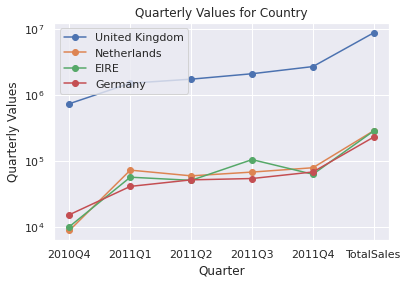

In [155]:
# About 84% Total Sales in United Kingdom, 16% in all other countries
# Top 4 Countries: United Kingdom, Netherlands, EIRE, and Germany.
# The smallest Total Sales in Saudi Arabia

# Plotting each row
for index, row in df_sales_by_country_q_pivot.head(4).iterrows():
    plt.plot(row.index, row.values, marker='o', label=index)

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Quarterly Values')
plt.title('Quarterly Values for Country')
plt.legend()
plt.grid(True)
plt.yscale('log')

# Display the plot
plt.show()

- Total Sales by next 5 Countries and year_quarter

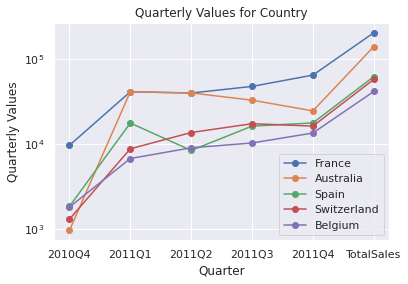

In [156]:
# Plotting each row
for index, row in df_sales_by_country_q_pivot.iloc[4:9].iterrows():
    plt.plot(row.index, row.values, marker='o', label=index)

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Quarterly Values')
plt.title('Quarterly Values for Country')
plt.legend()
plt.grid(True)
plt.yscale('log')

# Display the plot
plt.show()

- The least Sales by last 10 countries based on the TotalSales

In [158]:
df_sales_by_country_q_pivot.tail(10)

year_quarter           2010Q4   2011Q1   2011Q2   2011Q3   2011Q4  TotalSales
Country                                                                      
Malta                     NaN      NaN   863.16  1119.00   743.43     2725.59
United Arab Emirates      NaN   889.24      NaN  1013.04      NaN     1902.28
Lebanon                   NaN  1693.88      NaN      NaN      NaN     1693.88
Lithuania             1661.06      NaN      NaN      NaN      NaN     1661.06
European Community        NaN      NaN   623.45   676.80      NaN     1300.25
Brazil                    NaN      NaN  1143.60      NaN      NaN     1143.60
RSA                       NaN      NaN      NaN      NaN  1002.31     1002.31
Czech Republic            NaN   549.26      NaN      NaN   277.48      826.74
Bahrain                205.74      NaN   548.40      NaN      NaN      754.14
Saudi Arabia              NaN   145.92      NaN      NaN      NaN      145.92

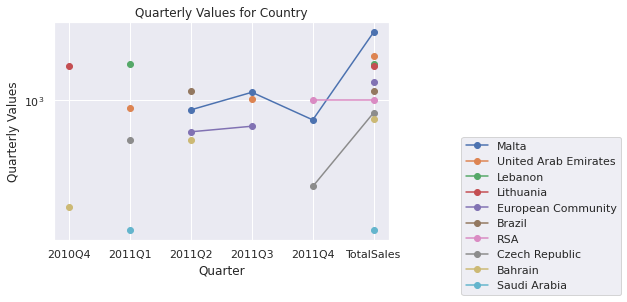

In [157]:
# Plotting each row
for index, row in df_sales_by_country_q_pivot.tail(10).iterrows():
    plt.plot(row.index, row.values, marker='o', label=index)

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Quarterly Values')
plt.title('Quarterly Values for Country')
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.grid(True)
plt.yscale('log')

# Display the plot
plt.show()

- The busiest months in terms of sales: Sep, Oct, Nov

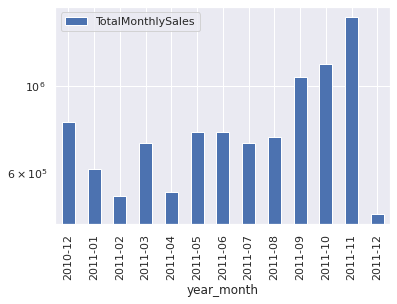

In [160]:
ax=df_sales_by_month.plot(x='year_month', y='TotalMonthlySales', kind='bar') 
ax.set_yscale('log')
plt.show()

- The busiest months in terms of Quantity: Sep, Oct, Nov

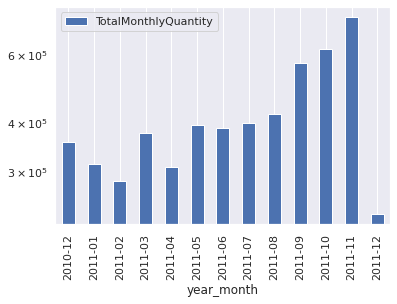

In [161]:
ax=df_q_by_month.plot(x='year_month', y='TotalMonthlyQuantity', kind='bar') 
ax.set_yscale('log')
plt.show()

- The busiest days of the week in terms of sales: Mon, Tue, Wed, Thr

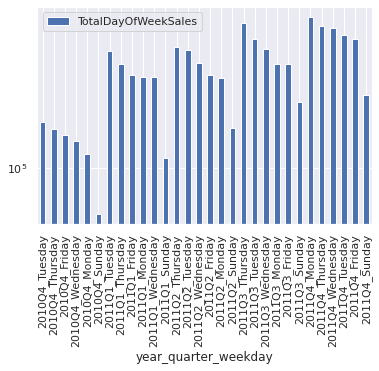

In [162]:
# the least busy day: Sun
df_sales_by_weekdays['year_quarter_weekday']=df_sales_by_weekdays['year_quarter']+'_'+df_sales_by_weekdays['day_of_week']
ax=df_sales_by_weekdays.plot(x='year_quarter_weekday', y='TotalDayOfWeekSales', kind='bar') 
ax.set_yscale('log')
plt.show()

- The busiest days of the week in terms of Quantity: Mon, Tue, Wed, Thr

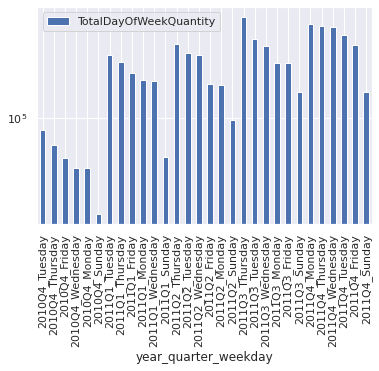

In [163]:
# the least busy day: Sun
df_q_by_weekdays['year_quarter_weekday']=df_sales_by_weekdays['year_quarter']+'_'+df_sales_by_weekdays['day_of_week']
ax=df_q_by_weekdays.plot(x='year_quarter_weekday', y='TotalDayOfWeekQuantity', kind='bar') 
ax.set_yscale('log')
plt.show()

- Top selling products based on the quantity sold across all countries

In [164]:
df_by_q_top_product = df_cleaned[['Description','Quantity']].groupby(['Description']).sum()
df_by_q_top_product.rename(columns={'Quantity': 'TotalQuantity'}, inplace=True)
df_by_q_top_product.sort_values(by=['TotalQuantity'], ascending=False, inplace=True)
df_by_q_top_product.reset_index(inplace=True)

pd.set_option('max_row', None)
df_by_q_top_product

Description  TotalQuantity
0       WORLD WAR 2 GLIDERS ASSTD DESIGNS          54951
1                 JUMBO BAG RED RETROSPOT          48371
2      WHITE HANGING HEART T-LIGHT HOLDER          37872
3                          POPCORN HOLDER          36749
4         PACK OF 72 RETROSPOT CAKE CASES          36396
5           ASSORTED COLOUR BIRD ORNAMENT          36362
6                      RABBIT NIGHT LIGHT          30739
7                 MINI PAINT SET VINTAGE           26633
8              PACK OF 12 LONDON TISSUES           26119
9      PACK OF 60 PINK PAISLEY CAKE CASES          24820
10        VICTORIAN GLASS HANGING T-LIGHT          24275
11              ASSORTED COLOURS SILK FAN          23826
12                    BROCADE RING PURSE           23020
13                 RED  HARMONICA IN BOX           21903
14                JUMBO BAG PINK POLKADOT          21448
15                   SMALL POPCORN HOLDER          20149
16        PAPER CHAIN KIT 50'S CHRISTMAS           19329
17                LUNCH BAG RED RETROSPOT          19232
18                          PARTY BUNTING          18283
19            60 TEATIME FAIRY CAKE CASES          18189
20              CHARLOTTE BAG SUKI DESIGN          18124
21                  HEART OF WICKER SMALL          17963
22            RED RETROSPOT CHARLOTTE BAG          17761
23                   JUMBO BAG STRAWBERRY          17283
24    COLOUR GLASS T-LIGHT HOLDER HANGING          16401
25                 JAM MAKING SET PRINTED          16396
26     GROW A FLYTRAP OR SUNFLOWER IN TIN          16244
27        60 CAKE CASES VINTAGE CHRISTMAS          16032
28            PACK OF 72 SKULL CAKE CASES          15169
29              PLACE SETTING WHITE HEART          15126
30                       JUMBO BAG APPLES          14908
31           ANTIQUE SILVER T-LIGHT GLASS          14664
32                     VINTAGE SNAP CARDS          14521
33                    SPACEBOY LUNCH BOX           14249
34          RED TOADSTOOL LED NIGHT LIGHT          14001
35         JUMBO  BAG BAROQUE BLACK WHITE          13900
36               REGENCY CAKESTAND 3 TIER          13851
37                 JUMBO STORAGE BAG SUKI          13651
38                     JUMBO BAG ALPHABET          13366
39            SMALL CHINESE STYLE SCISSOR          13328
40         72 SWEETHEART FAIRY CAKE CASES          13319
41                 WOODLAND CHARLOTTE BAG          13290
42    SET/20 RED RETROSPOT PAPER NAPKINS           13202
43        DISCO BALL CHRISTMAS DECORATION          12883
44           SET OF 4 PANTRY JELLY MOULDS          12649
45      JUMBO SHOPPER VINTAGE RED PAISLEY          12574
46           HOMEMADE JAM SCENTED CANDLES          12520
47       HANGING HEART JAR T-LIGHT HOLDER          12493
48        GIRLS ALPHABET IRON ON PATCHES           12442
49           TRAVEL CARD WALLET KEEP CALM          12366
50         PACK OF 60 DINOSAUR CAKE CASES          12312
51           PLEASE ONE PERSON METAL SIGN          12274
52                LUNCH BAG  BLACK SKULL.          12195
53                 LUNCH BAG APPLE DESIGN          12147
54                BUBBLEGUM RING ASSORTED          12050
55    SET OF 60 PANTRY DESIGN CAKE CASES           12049
56                    LUNCH BAG CARS BLUE          11786
57                   DOLLY GIRL LUNCH BOX          11780
58            GIN + TONIC DIET METAL SIGN          11709
59               BLACK RECORD COVER FRAME          11651
60                LUNCH BOX I LOVE LONDON          11504
61               JUMBO BAG VINTAGE DOILY           11448
62                         JUMBO BAG OWLS          11429
63         JUMBO BAG PINK VINTAGE PAISLEY          11006
64       PINK BLUE FELT CRAFT TRINKET BOX          10993
65                 JUMBO BAG VINTAGE LEAF          10941
66         HANGING JAM JAR T-LIGHT HOLDER          10792
67    WOODEN HEART CHRISTMAS SCANDINAVIAN          10608
68      PAPER CHAIN KIT VINTAGE CHRISTMAS          10594
69     MULTI COLOUR SILVER T-LIGHT HOLDE

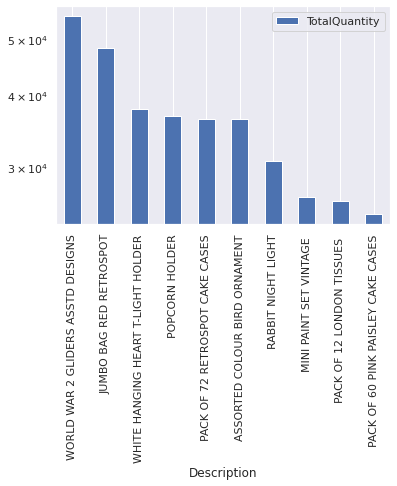

In [165]:
# top 10 products
ax=df_by_q_top_product.head(10).plot(x='Description', y='TotalQuantity', kind='bar') 
ax.set_yscale('log')
plt.show()

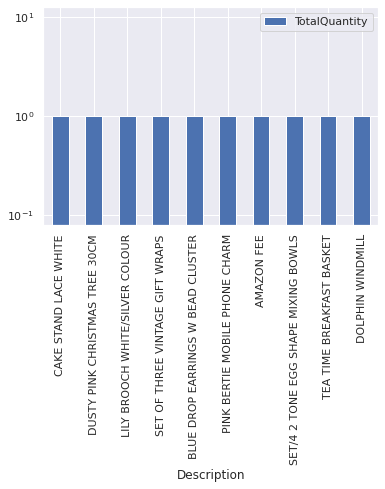

In [166]:
# least 10 products (Amazon Fee??)
ax=df_by_q_top_product.tail(10).plot(x='Description', y='TotalQuantity', kind='bar') 
ax.set_yscale('log')
plt.show()

- Top customers based on the Quantity purchased are from ['United Kingdom', 'EIRE', 'Netherlands', 'Australia']

In [167]:
df_by_custid_q = save_df_cust[['CustomerID','Quantity']].groupby(['CustomerID']).sum()
df_by_custid_q.rename(columns={'Quantity': 'TotalQuantity'}, inplace=True)
df_by_custid_q.sort_values(by=['TotalQuantity'], ascending=False, inplace=True)
df_by_custid_q.reset_index(inplace=True)

#top 10 customers based on quantity purchased
df_by_custid_q.head(10)

CustomerID  TotalQuantity
0     14646.0         197491
1     16446.0          80997
2     14911.0          80490
3     12415.0          77670
4     12346.0          74215
5     17450.0          69973
6     17511.0          64549
7     18102.0          64124
8     13694.0          63312
9     14298.0          58343

In [170]:
# Products Sample list purchased by top 10 customers
top_cust_df['Description'].unique().tolist()[0:20]

['CHRISTMAS LIGHTS 10 REINDEER',
 'JAM MAKING SET WITH JARS',
 'JAM MAKING SET PRINTED',
 'JAM JAR WITH PINK LID',
 'JAM JAR WITH GREEN LID',
 'ROSE COTTAGE KEEPSAKE BOX ',
 'HANGING HEART ZINC T-LIGHT HOLDER',
 'PAPER CHAIN KIT VINTAGE CHRISTMAS',
 'DISCO BALL CHRISTMAS DECORATION',
 'WHITE HANGING HEART T-LIGHT HOLDER',
 'SMALL POPCORN HOLDER',
 'LARGE POPCORN HOLDER ',
 'RETROSPOT LARGE MILK JUG',
 'SET/20 RED RETROSPOT PAPER NAPKINS ',
 'SET/6 RED SPOTTY PAPER PLATES',
 'SET/6 RED SPOTTY PAPER CUPS',
 'POLKADOT RAIN HAT ',
 'DELUXE SEWING KIT ',
 'RETROSPOT HEART HOT WATER BOTTLE',
 'KNITTED UNION FLAG HOT WATER BOTTLE']

## Discussion

In this project, we analyzed transactional data from an online retail store spanning from 2010 to 2011. The dataset, named Online Retail.xlsx, contains information on customer purchases from 38 countries, including product details, quantities, prices, and timestamps. Our goal was to explore and analyze this data to gain insights into sales trends, customer behavior, and popular products, ultimately aiding in making key business decisions. This project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

We performed data cleaning to prepare the data for analysis, ensuring it met quality criteria such as validity, uniformity, accuracy, consistency, and completeness. Data cleansing involved removing unwanted, duplicate, and incorrect data from the dataset, thus helping us develop accurate insights. During this process, we identified several anomalies:

- 5268 duplicate rows
- 1454 rows with missing descriptions
- approximately 25% of all rows with missing customer IDs (unique identifiers for customers)
- 9727 rows with either negative quantities or unit prices
- 581 rows with zero sales (Quantity * UnitPrice) due to a unit price of 0
- 442 rows without specified countries where transactions occurred

These anomalies indicate data management issues, such as the lack of methods to detect redundant observations and identify missing values for crucial fields like descriptions or customer IDs. Negative quantities, negative or zero unit prices are incorrect and impact accurate insights into sales.

We also identified nine unit price outliers with descriptions like fee, postages, manual, and adjust bad debt. Clearer descriptions would provide better insights into these outliers. Additionally, there were three quantity outliers (occurring in the United Kingdom), one of which had a unit price of 0. We should pay attention to these outliers (MEDIUM CERAMIC TOP STORAGE JAR, ASSTD DESIGN 3D PAPER STICKERS, and PAPER CRAFT, LITTLE BIRDIE) when forecasting future sales in the United Kingdom, as they seem to be the most sellable items.

Sales are calculated as Quantity * UnitPrice, with DOTCOM POSTAGE being the top sale. The most frequently bought products are WHITE HANGING HEART T-LIGHT HOLDER and JUMBO BAG RED RETROSPOT, and the most frequent quantities sold are 1 and 2. The best-selling products based on quantity sold are WORLD WAR 2 GLIDERS ASSTD DESIGNS, JUMBO BAG RED RETROSPOT, and WHITE HANGING HEART T-LIGHT HOLDER. TO MATCH ALL CUSHIONS is the product with the smallest sale.

Approximately 84% of total sales are in the United Kingdom, making it the biggest market, while 16% are in all other countries. The smallest total sales are in Saudi Arabia. Interestingly, each country has a unique best-selling product, with no two countries sharing the same top product. This should be considered when making strategic business decisions. Additionally, attention should be paid to countries with the smallest sales, like Malta, the United Arab Emirates, or Saudi Arabia. These markets have the potential for increased sales, so further research to identify the best products for these markets seems beneficial.

The busiest months in terms of sales or quantity sold are September, October, and November. The busiest days of the week are Monday, Tuesday, Wednesday, and Thursday. It seems strange that Sunday is the least busy day, so further research is needed to understand this. The top customers based on quantity purchased are from the United Kingdom, EIRE, the Netherlands, and Australia.

## Conclusion  <a name="conclusion"></a>

- Addressing data management issues identified during the data cleansing step would be highly beneficial. If the dataset is to be maintained in Excel, consider adding macros to detect redundant observations and identify missing values in crucial fields like descriptions or customer IDs. Macros can also correct negative quantities, negative or zero unit prices, or unspecified countries.

- Next, consider repeating the same analysis performed in this project for each of the 38 countries to obtain more detailed information about sales trends, customer behavior, and popular products. This will help tailor strategic business decisions and enhance the store's overall performance.

- Revising some of the descriptions to accurately capture the nature of the products in question is also recommended. Clearer descriptions would provide better insights into items like fees, postages, manuals, and adjustments for bad debt.

- Further research should be conducted to identify the best products for countries with the smallest sales, such as Malta, the United Arab Emirates, or Saudi Arabia. Additionally, investigate why Sunday is the least busy day in terms of sales.

- When forecasting future sales in the United Kingdom, be mindful of quantity outliers, as they appear to be the most sellable items.